In [1]:
# For using custom module.
import sys
sys.path.append('../custom_library')

In [2]:
import spacy
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import numpy as np
import pandas as pd 
import connect_to_db as cn
from gensim import corpora
import gensim
import csv
import parmap
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import seaborn as sns
import pymysql.cursors
import pandas as pd
import numpy as np
import connect_to_db as cn
import json
from itertools import combinations
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import csv
import parmap
import random

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
2022-05-31 15:04:35.229317: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [3]:
sql = "select community_id_fastgreedy_is, count(*) from nodes_until_november group by community_id_fastgreedy_is having count(*) > 2 order by count(*) asc;"
result_df = cn.select_query_result_to_df(sql)
communities = list(np.array(result_df['community_id_fastgreedy_is'].values.tolist()))

In [4]:
from os import listdir

def find_csv_filenames(path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

filenames = find_csv_filenames("../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne")

communities = []

for name in filenames:
    communities.append(name.split('_')[1])

In [199]:
# print(filenames)
print(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne/{filenames[0]}')

../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne/community_6849_topics_10_words.csv


In [11]:
import math

mean_vector_list = []
topics_num = []

for i in range(len(communities)):
    with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne/{filenames[i]}', newline='') as f:
        reader = csv.reader(f)
        topics = list(reader)
        topics_num.append(len(topics))
        topics = list(set(sum(topics, [])))
        
        topics_rst = []
        topics_rst.append(topics)
        print(topics_rst)
        model = Word2Vec(topics_rst, min_count=1)
        # model.train(topics, total_examples=1, epochs=1)
    
        word_vectors = model.wv
        # print(len(word_vectors))

        # print(word_vectors[0].tolist())

        word_vector_list = []
        mean_vector = []
    
        for i in range(len(word_vectors)):
            word_vector_list.append(word_vectors[i].tolist())
        
        for element in zip(*word_vector_list):
            mean_vector.append(float(np.mean(element)))
        
        mean_vector_list.append(mean_vector)

[['friend', 'hate', 'best', 'kid', 'man', 'in', 'looking', 'irish']]
[['stressed', 'pick', 'crazy', 'work', 'especially', 'throwing', 'acne', 'away', 'anxiety', 'worst']]
[['sabotaging', 'career', 'suicide', 'need', 'close', 'change', 'anxiety', 'depression', 'life', 'pill']]
[['opening', 'anxious', 'counseling', 'message', 'every', 'cry', 'session']]
[['hate', 'ppl', 'slept', 'daughter', 'engages', 'theyre', 'ago', 'better', 'bf', 'say']]
[['friend', 'infront', 'almost', 'killed']]
[['know', 'donâ€™t', 'anymore']]
[['feeling', 'way', 'online', 'option', 'family', 'drunk', 'fantasize', 'honestly', 'game', 'insecure', 'cry', 'say', 'consistent', 'extremely', 'actually', 'life', 'friend', 'loved', 'poem', 'bday', 'depression', 'aware', 'wrote', 'head', 'depressed', 'body', 'right', 'tried', 'one', 'allowed']]
[['mom', 'turned', 'loneliness', 'slowly', 'killing', 'recently', 'remembered', 'think', 'one', 'even']]
[['fear', 'said', 'antidepressant', 'go', 'little', 'user', 'alone', 'die', 

[['covid', 'low', 'exactly', 'right', 'mood', 'angry', 'depression', 'boyfriend']]
[['today', 'feeling', 'dreaming', 'time', 'bad', 'ive', 'felt', 'selfish', 'throwing', 'earlier']]
[['friend', 'two', 'capable', 'nowhere', 'best', 'aimless', 'kinda', 'gf', 'lonely', 'broke']]
[['symptom', 'use', 'woke', 'pretty', 'sore', 'struggling', 'based', 'consider', 'psychedelic', 'anxiety']]
[['friend', 'alone', 'dream', 'crushed', 'use', 'chat', 'pls', 'with', 'far', 'talk']]
[['tired', 'ive', 'world']]
[['le', 'abuser', 'begged', 'depressing', 'shit', 'grandmother', 'wrong', 'think', 'beautiful', 'say']]
[['today', 'grief', 'best', 'birthday', 'brother', 'without', 'dad', 'away', 'father', 'scared']]
[['particular', 'esp', 'camgirls', 'money', 'struggling', 'one', 'watching', 'compare', 'found', 'bf']]
[['future']]
[['almost', 'getting', 'failure', 'rent', 'pay', 'future', 'parent', 'deppresion', 'yo', 'killed']]
[['usa', 'hotline', 'mentally', 'turn', 'idk', 'insane']]
[['literally', 'sudden'

[['prescribed', 'social', 'house', 'internet', 'stimulant', 'app', 'leave', 'cptsd', 'anxiety', 'scared']]
[['feeling', 'reason', 'sketch', 'paranoid', 'help', 'phone', 'guy', 'hey', 'mode', 'isolated']]
[['oneâ€™s', 'negative', 'give', 'best', 'died', 'must', 'childhood', 'mood', 'found', 'one']]
[['final', 'pas', 'exam', 'class', 'end', 'circuit', 'depression', 'life']]
[['friend', 'quarantine', 'worse', 'sister', 'making', 'wrong', 'disappear', 'mad', 'getting']]
[['bpd', 'limit', 'dae', 'person', 'need', 'full', 'never', 'tell', 'plan', 'one']]
[['cent', 'birthday', 'end', 'itâ€\x9d', 'abused', 'â€œ46', 'cancelled', 'found', 'longer', 'backflip']]
[['kill', 'care', 'soon', 'die', 'living', 'tired', 'attachment', 'actually', 'scared', 'one']]
[['yea', 'loneliness', 'booking', '2hour', 'waste', 'alleviate', 'lonely', 'sex', 'worker', 'life']]
[['abuse', 'alone', 'worse', 'finally', 'past', 'week', 'dad', 'passed', 'everyday', 'since']]
[['kill', 'ive', 'give', 'work', 'suicide', 'thi

[['friend', 'extrovert', 'attractive', 'curse', 'no', 'loved', 'girl', 'better', 'lost']]
[['literally', 'time', 'without', 'remember', 'hasnâ€™t', 'cry', 'better', 'anxiety', 'seeming', 'long']]
[['usa', 'die', 'goodbye', 'exit', 'buy', 'suicide', 'proper', 'bag', 'say', 'ex']]
[['friend', 'square', 'terrible', 'bad', 'health', 'insurance', 'believe', 'sex', 'day', 'one']]
[['girlfriend', 'health', 'suicide', 'needed', 'theyâ€™re', 'never', 'illness', 'college', 'think', 'realized', 'alone', 'gonna', 'human', 'sure', 'always', 'everybody', 'guilt', 'connection', 'away', 'mental', 'classmate', 'care', 'them', 'new', 'due', 'ghosted', 'anybody', 'therapist', 'slump', 'pushed']]
[['social', 'festival', 'convention', 'large', 'take', 'anxiety']]
[['kill', 'them', 'said', 'gonna', 'crisis', 'calm', 'purpose', 'hit', 'life', 'moment']]
[['kill', 'extinguished', 'ðÿ™ƒðÿ™ƒ', 'done', 'anger', 'wellbutrin', 'rotting', 'advice', 'also', 'male', 'passion', 'sick', 'homophobic', 'shitty', 'life', 

[['followed', 'island', 'nearly', 'twitch', 'crossing', 'channel', 'year', 'animal', 'hour', 'visited']]
[['momma', 'friendship', 'sad', 'ruined']]
[['kill', 'much', 'feeling', 'loud', 'go', 'cry', 'today', 'alone', 'crazy', 'even', 'yell', 'doctor', 'cope', 'explain', 'dried', 'eye', 'tear', 'depression', 'love', 'made', 'talking', 'foster', 'kitten', 'physically', 'person', 'need', 'year', 'amp', 'talk']]
[['much', 'though', 'failing', 'weight', 'uni', 'seen', 'saying', 'eating', 'depression', 'cause']]
[['friend', 'nobody', 'need', 'notice', 'exist', 'even']]
[['introspective', 'creativity', 'school', 'year', 'matter', 'luck', 'friendship', 'looking', 'strange', 'worst']]
[['today', 'grandpa', 'died', 'government', 'wasted', 'size', 'regret', 'thought', 'childhood', 'caring']]
[['feeling', 'getting', 'hard', 'fat', 'sister', 'wave', 'this', 'called', 'depression', 'sadness']]
[['watering', 'turned', 'ice', 'way', 'resorted', 'water', 'feeding', 'tenant', 'hour', 'maintenance']]
[['i

[['setting', 'mom', 'presentation', 'date', 'online', 'suicide', 'mechanism', 'tomorrow', 'lmao', 'coping']]
[['exemplifies', 'scare', 'corona', 'breed', 'coronavirus', 'perfectly', 'opinion', 'anxiety', 'you', 'getting']]
[['help', 'die', 'please', 'want']]
[['lazy', 'nurse', 'annoying', 'med', 'quit', 'medium', 'depressed', 'attentionwhore', 'cold', 'turkey']]
[['friend', 'forgive', 'them', 'ive', 'kid', 'ended', 'family', 'suicide', 'trying', 'relationship']]
[['lonely']]
[['friend', 'traumatic', 'experience', 'new', 'managing', 'family', 'horrifying', 'realization', 'even']]
[['personality', 'handle', 'acted', 'intrusive', 'relationship', 'thought', 'avoidant', 'sounded', 'weird', 'recurring']]
[['nude', 'spider', 'today', 'go', 'died', 'kid', 'really', 'sent', 'frequently', 'life']]
[['friend', 'youâ€™re', 'though', 'best', 'birthday', 'standing', 'forgot', 'face', 'punched', 'even']]
[['kill', 'mom', 'slight', 'die', 'cat', 'living', 'stuck', 'rambling', 'loop', 'question']]
[['p

[['girlfriend', 'dead', 'sex', 'found', 'native', 'today', 'many', 'american', 'gone', 'life', 'back', 'guilt', 'past', 'm25', 'dad', 'coming', 'terrified', 'fed', 'hurt', 'first', 'year', 'cheated']]
[['public', 'stop', 'way', 'end', 'overthinking', 'artist', 'anxiety', 'tried', 'madness', 'create']]
[['taking', 'mom', 'shower', 'pay', 'stupidity', 'â‚¬100', 'plan', 'depression', 'life', 'made']]
[['deal', 'describe', 'cure', 'burnout', 'fog', 'need', 'brain', 'burnt', 'out', 'found']]
[['overdose', 'acetaminophen']]
[['feeling', 'alone', 'blue', 'everyone', 'kinda', 'day']]
[['title', 'effect', 'come', 'thought', 'go', 'find', 'tried', 'mental', 'even', 'rneedafreind']]
[['doctor', 'switch', 'judge', 'new', 'online', 'posted', 'current', 'anxiety', 'age', 'one']]
[['taking', 'mom', 'crazy', 'input', 'money', 'need', 'parent', 'gaslighting', 'job', 'one']]
[['right', 'now']]
[['covid', 'â€œbut', 'motherâ€\x9d', 'ruined', 'sheâ€™s', 'across', 'racism', 'still', 'youâ€™re', 'look']]
[['

[['friend', 'suicidal', 'bad', 'statement', 'tw', 'suicide', 'political']]
[['kill', 'ive', 'horrid', 'nothing', 'need', 'sadder', 'pain', 'mood', 'think', 'escape']]
[['crazy', 'possible', 'heal', 'abuser', 'thought', 'relationship', 'gaslighting', 'emotional', 'out', 'extremely']]
[['schizophrenic', 'lonely', 'sexting', 'problem', 'think', 'something', 'sheâ€™s', 'normal', 'always', 'wrongdoing', 'confessing', 'disorder', 'stupid', 'extreme', 'yet', 'tell', 'all', 'mental', 'them', 'sister', 'possible', 'ha', 'parent', 'depressed', 'telling', 'regret', 'instantly', 'cousin']]
[['final', 'ive', 'tonight', 'night', 'end', 'decided', 'plan', 'life']]
[['diagnosis', 'hypercalcemia', 'three', 'ceaseless', 'day', 'anxiety', 'now']]
[['bad', 'give', 'spiked', 'up', 'read', 'ago', 'thought', 'trauma', 'ptsd', 'think']]
[['working', 'program', 'inpatient', 'currently', 'stopped', 'effexor', 'day', 'mental', 'depression']]
[['suicide', 'committed', 'boyfriend', 'ex']]
[['va', 'cured', 'change'

[['much', 'alone', 'died', 'station', 'grandma', 'heart', 'gas', 'worker', 'love', 'hurt']]
[['setting', 'spent', 'selfharm', 'aside', 'fuck', 'take', 'beer', 'future']]
[['fail', 'method', 'failure', 'finally', 'need', 'disappointment', 'trying', 'decided', 'poor', 'km']]
[['looking', 'lot', 'them', 'sometimes', 'person', 'kind', 'outside', 'perspective', 'straight', 'look']]
[['sudden', 'cut', 'toxic', 'finished', 'bachelor', 'thought', 'intrusive', 'degree', 'say']]
[['move', 'trained', 'human', 'whatever', 'fuck', 'need', 'shit', 'mother', 'fucker', 'say']]
[['ocd', 'misrepresent', 'obsessive', 'fighting', 'suicide', 'cleaner', 'show', 'compulsive', 'think', 'long']]
[['exhausting', 'ended', 'physically', 'horribly', 'naw', 'become', 'american', 'again', 'interact', 'tried']]
[['socially', 'move', 'used', 'motivation', '18th', 'losing', 'finalizing', 'underdeveloped', 'fake', 'plan']]
[['watch', 'tomorrow', 'doctorâ€™s', 'leave', 'exhaustion', 'youtube', 'appointment', 'wanted', 'a

[['anxiety', 'lifeand', 'health', 'ruining']]
[['girlfriend', 'almost', 'hate', 'validated', 'could', 'guy', 'day', 'talk', 'broke', 'cause']]
[['much', 'miss', 'dog', 'day', 'one']]
[['guilty']]
[['covid', 'rant']]
[['anxietyptsd', 'medication', 'worse', 'panic', 'attack']]
[['alone', 'time', 'utterly', 'started', 'first', 'and', 'turning', 'emotion', 'university', 'life']]
[['late', 'that', 'way', 'end', 'robbed', 'decision', 'sure', 'enjoy', 'life', 'youth']]
[['friend', 'single', 'making', 'without', 'depressed', 'day', 'all', 'mother', 'matted', 'virgin']]
[['misdiagnosed', 'need', 'yeah', 'dealing', 'year', 'support', 'adhd', 'anxiety', 'hey', 'you']]
[['really', 'antidepressant', 'losing', 'luck', 'cry', 'comprehend', 'sure', 'friend', 'wake', 'help', 'dad', 'relationship', 'wish', 'depression', 'strained', 'point', 'new', 'without', 'need', 'therapist', 'depressed', 'year', 'guess', 'anxiety', 'boring']]
[['anxious', 'start', 'well', 'dae', 'person', 'different', 'theyre', 'com

[['kill', 'literally', 'feeling', 'wonâ€™t', 'hug', 'experience', 'ive', 'iâ€˜m', 'showing', 'antidepressant', 'unexist', 'never', 'probably', 'problem', 'gambling', 'taking', 'hate', 'start', 'bright', 'reddit', 'post', 'always', 'put', 'wait', 'friend', 'lot', 'idk', 'thought', 'lost', 'depression', 'future', 'motivation', 'need', 'first', 'ill', 'm15', 'anxiety', 'one']]
[['hug', 'health', 'conscious', 'never', 'lonely', 'suffocating', 'group', 'whole', 'nobody', 'wearing', 'hat', 'life', 'cope', 'mask', 'past', 'solid', 'tell', 'wish', 'exists', 'depression', 'public', 'sister', 'discussion', 'without', 'need', 'iâ€™ll', 'able', 'depressed', 'mother', 'maga']]
[['slept', 'couple', 'mentally', 'behind', 'finally', 'ill', 'hasnâ€™t', 'grub', 'squirmy', 'ex']]
[['small', 'social', 'human', 'back', 'victory', 'normal', 'animal', 'yesterday', 'go', 'life']]
[['kill', 'give', 'suicide', 'lonely', 'swap', 'cry', 'advice', 'something', 'title', 'worse', 'interrested', 'ok', 'hung', 'here',

[['suicidal', 'feeling', 'birthday', 'said', 'never', 'college', 'think', 'hate', 'die', 'worse', 'up', 'nobody', 'killing', 'read', 'life', 'harm', 'wake', 'back', 'failing', 'tell', 'thought', 'better', 'men', 'depression', 'world', 'school', 'he', 'person', 'detached', 'therapist', 'therapy', 'depressed', 'need', 'day', 'talk', 'scared', 'still']]
[['ect', 'therapy', 'tried', 'electroconvulsive']]
[['girlfriend', 'friend', 'care', 'doesnâ€™t', 'advice', 'bad', 'communicating', 'yesterday', 'friendship', 'broke']]
[['panic', 'attack', 'struggling', 'transphobic', 'thought', 'allergy', 'food']]
[['girlfriend', 'kill', 'joke', 'smile', 'near', 'stop', 'ethnicity', 'born', 'getting', 'mine', 'taking', 'hate', 'worse', 'making', 'faking', 'reason', 'indian', 'back', 'wish', 'depression', 'either', 'care', 'big', 'new', 'need', 'depressed', 'year', 'forgetting', 'one', 'quarentine']]
[['hate', 'hair', 'loss', 'circumstance', 'depressed']]
[['video', 'tv', 'anger', 'punched', 'game']]
[['o

[['enjoying', 'way', 'convince', 'done', 'empty', 'space', 'die', 'house', 'most', 'lead', 'life', 'could', 'away', 'buggs', 'boyfriend', 'thereâ€™s', 'gun', 'oxygen', 'end', 'use', 'stress', 'bye', 'mother', 'death', 'existing', 'scared', 'let']]
[['time', 'jump', 'worse', 'tired', 'debilitating', 'survival', 'day', 'anxiety', 'depending', 'job']]
[['sign', 'kill', 'today', 'time', 'way', 'looked', 'use', 'result', 'stressful', 'thats']]
[['smoke', 'anxious', 'activity', 'social', 'normal', 'need', 'come', 'nardil', 'generally', 'anxiety']]
[['pushover', 'here']]
[['if', 'standing', 'thought', 'random', 'yourself']]
[['hug', 'much', 'whats', 'ready', 'ahhhhhhhhhhhhhhhh', 'empathy', 'virtual', 'take', 'allowed', 'administered']]
[['activity', 'anxietyâ€\x9d', 'timeâ€\x9d', 'swallowing', 'diagnosis', 'theyâ€™re', 'certificate', 'saying', 'actually', 'say']]
[['feel', 'kill', 'thinking', 'suicide', 'honestly', 'tunnel', 'want', 'friendship', 'wait', 'like']]
[['happened', 'idea']]
[['dis

[['realized', 'smoking', 'weed', 'spending', 'extreme', 'year', 'right', 'anxiety', 'life', 'why']]
[['talking', 'feeling', 'annoying', 'stupid', 'afraid', 'honestly', 'depressed', 'teenager', 'hiding', 'talk']]
[['ive', 'birthday', 'rape', 'came', 'lonely', 'yesterday', 'problem', 'today', 'post', 'nickname', 'even', 'ignore', 'week', 'rant', 'living', 'cut', 'statutory', 'went', 'believe', 'person', 'dated', 'gf', 'year', 'cheated', 'girl', 'every', 'day', 'regret']]
[['feeling', 'nowhere', 'hopeless', 'person', 'stuck', 'anyones', 'favourite', 'overthinker', 'never', 'life']]
[['stop', 'way', 'this', 'done', 'face', 'selfsabotage', 'cry', 'wipe', 'fine', 'somebody', 'ruined', 'music', 'nobody', 'discomfort', 'friendship', 'life', 'overwhelming', 'act', 'save', 'others', 'you', 'world', 'carve', 'mind', 'physically', 'around', 'need', 'teach', 'yourself', 'told']]
[['stop', 'feeling', 'lonely']]
[['much', 'pressure', 'driving', 'house', 'fantasize', 'close', 'seem', 'lost', 'let', 'c

[['felt', 'quit', 'worrying', 'front', 'catastrophising', 'apart']]
[['kill', 'suicidal', 'monday', 'stop', 'motivationi', 'dead', 'found', 'think', 'today', 'last', 'die', 'gonna', 'life', 'even', 'friend', 'best', 'moneyno', 'ready', 'back', 'boyfriend', 'hurt', 'care', 'tonight', 'end', 'year', 'right', 'one', 'now']]
[['pure', 'control', 'more', 'need', 'could', 'anger', 'life', 'exchange']]
[['bad', 'give', 'way', 'facebook', 'suicide', 'usually', 'shit', 'begin', 'think', 'painless', 'hate', 'relapse', 'lasted', 'actually', 'set', 'reason', 'good', 'beat', 'eye', 'could', 'wish', 'depression', 'future', 'method', 'rant', 'went', 'close', 'sorry', 'far']]
[['mom', 'hate', 'failure', 'depend', 'normal', 'indifferent', 'death', 'girl', 'smiled', 'pill']]
[['almost', 'die', 'grip', 'funny', 'slowly', 'tomorrow', 'depressed', 'losing', 'eating', 'life']]
[['die', 'hard', 'give', 'shallow', 'fing', 'decided', 'place', 'world']]
[['send', 'hope', 'night', 'up', 'downhill', 'every', 'wis

[['advice', 'depressive', 'burning', 'situation', 'mindset', 'scared']]
[['friend', 'mixed', 'black', 'dating', 'money', 'up', 'asian', 'girl', 'guy', 'letter']]
[['renew', 'prescription', 'doctor', 'whats', 'antidepressant', 'become', 'old', 'year', 'pls', 'every']]
[['picture', 'with', 'obsessed', 'lovely']]
[['final', 'goodbye', 'bad', 'âœ‹ðÿ\x8f»', 'place']]
[['kill', 'time', 'beginning', 'sometimes', 'gonna', 'sind', 'year', 'downhill', 'sleep', 'guilty']]
[['drinking', 'thinking', 'close', 'death', 'anything', 'tried', 'bleach', 'failed']]
[['somewhere', 'begging', 'normal', 'handle', 'need', 'year', 'perfectly', 'crumbling', 'situation', 'brain']]
[['note', 'ask', 'everyone']]
[['friend', 'othertrying', 'venting', 'late', 'interested', 'other', 'dming', 'illness', 'mental', 'uplift']]
[['bother', 'reddit', 'chat', 'even']]
[['friend', 'today', 'best', 'lazy', 'asshole', 'called', 'counselor', 'thought']]
[['today', 'hate', 'die', 'toxic', 'way', 'depressed', 'fall', 'job', 'moun

[['numb', 'one', 'question']]
[['insomnia', 'die', 'ruined', 'fact', 'growth', 'end', 'suffer', 'anxiety', 'since', 'scared']]
[['deepfakes', 'dystopian', 'social', 'dog', 'medium', 'unattractive', 'pound', 'nightmare', 'think', 'boyfriend']]
[['care', 'hate', 'sad', 'terrible', 'need', 'calm', 'keep', 'anxiety', 'take', 'advise']]
[['picture', 'taking', 'bikini', 'window', 'falling', 'girl', 'mum', 'apart', 'life']]
[['broken', 'recovering', 'chat', 'lonely', 'heart']]
[['assist', 'way', 'suicide', 'never', 'step', 'everyone', 'afraid', 'friend', 'attempt', 'medication', 'best', 'daughter', 'afford', 'depression', 'taco', 'love', 'cheese', 'difficulty', 'night', 'therapist', 'therapy', 'old', 'year', 'take', 'find', 'anxiety', 'one', 'budget']]
[['seems', 'go', 'prozac', 'best', 'whats', 'option', 'different', 'idk', 'opinion', 'ssri']]
[['happiness', 'life', 'fuck', 'strugfling']]
[['terrible', '60sat', 'coronavirus', 'second', 'ocd', 'kiss', 'scare', 'ther', 'inexperience', 'life', 

[['hard', 'stop', 'new', 'year', 'lonely', 'injuring', 'yourself', 'happy']]
[['creature']]
[['insomnia', 'miss', 'interest', 'book', 'read', 'stole', 'lost', 'hobby', 'depression', 'blank']]
[['turning', 'covid19', 'virus', 'wreck']]
[['much', 'loneliness', 'second', 'wow', 'chili', 'row', 'today', 'last', 'dog', 'â€œdudeâ€\x9d', 'relapse', 'hey', 'life', 'even', 'well', 'dreadful', 'lost', 'mental', 'accurate', 'love', 'miss', 'went', 'believe', 'person', 'handle', 'moving', 'chat', 'day', 'sleep']]
[['lot', 'reconnect', 'maybe', 'letting', 'go', 'regret', 'reddit', 'ashamed', 'writing', 'look']]
[['time', 'hard', 'manic', 'honest', 'option', 'become', 'therapist', 'read', 'weird', 'question']]
[['low', 'selfharm', 'antidepressant', 'relapse', 'relationship', 'disease', 'ruining', 'month', 'libido', 'love']]
[['friend', 'fear', 'group', 'secret', 'chat', 'shit', 'constant', 'talk', 'you']]
[['ive', 'alot', 'suicide', 'ig', 'struggling', 'matter', 'note', 'lately', 'angry', 'even']]
[

[['rn', 'hate', 'die', 'believe', 'stuck', 'iâ€™ll', 'told', 'think']]
[['boy', 'insurance', 'normal', 'one', 'old', 'year', 'chance', 'monster', 'void', 'getting']]
[['friend', 'alone', 'felt', 'lockdown', 'reddits', 'agreementâ€\x9d', 'real', 'user', 'looking', 'even']]
[['start', 'overwhelmed', 'kind', 'world']]
[['half', 'used', '19m', 'amp', 'honestly', 'socializing', 'gone', 'place', 'brain', 'simply']]
[['feeling', 'anxious', 'nearly', 'fine', 'dread', 'stomach', 'sick', 'right', 'anxiety']]
[['taking', 'end', 'decide', 'escaping', 'addicted', 'therapist', 'pls', 'tell', 'reality', 'life']]
[['kill', 'suicidal', 'somewhat', 'suicide', 'crazyyyy', 'lonely', 'ago', 'go', 'advice', 'today', 'gonna', 'selfish', 'sure', 'even', 'attempt', 'happen', 'thinking', 'could', 'tell', 'made', 'school', 'use', 'close', 'parent', 'year', 'counselor', 'day', 'tried', 'support']]
[['orlova', 'okay', 'hotforwords', 'marina']]
[['birthday']]
[['funeral', 'dream', '33f', 'catch', 'teacher', 'okay',

[['fear', 'hate', 'xbox', 'failure', 'arguing', 'play', 'partner', 'ruin', 'freeze', 'scared']]
[['time', 'ive', 'slowly', 'struggling', 'read', 'drowning', 'save', 'done', 'think', 'life']]
[['advice', 'mind', 'bad', 'tonight', 'sometimes', 'horrible', 'need', 'never', 'anxiety', 'cross']]
[['hate', 'available', 'device', 'le', 'demand', 'back', 'popular', 'app', 'could', 'lonely']]
[['doesnâ€™t', 'summer', 'family', 'shamble', 'fuck', 'money', 'hormone', 'go', 'problem', 'assume']]
[['narcolepsy', 'lip', 'controlling', 'picking', 'life']]
[['literally', 'jump', 'way', 'rupert', 'suicide', 'family', 'sex', 'spira', 'destroyed', 'dysfunction', 'everyone', 'erectile', 'red', 'life', 'pack', 'doctor', 'performance', 'beta', 'thought', 'nonduality', 'cause', 'telling', '29yo', 'serious', 'young', 'sexual', 'anxiety', 'failed', 'blocker', 'ex']]
[['ruined', 'need', 'eating', 'sufferer', 'anger', 'go', 'anxiety', 'drug', 'say', 'sadness']]
[['dissecting', 'girl', 'every', 'relationship', 'a

[['talking', 'abuse', 'talent', 'useless', 'farewell', 'cut', 'suicide', 'nonstop', 'everyday', 'completely']]
[['relationship', 'bad', 'society', 'rape', 'â€œnormalâ€\x9d', 'sex', 'change', 'seem', 'weird', 'now']]
[['friend', 'best', 'ruined', 'point', 'nutshell', 'realizing', 'thereâ€™s', 'anything', 'one', 'life']]
[['care', 'alone', 'time', 'nobody', 'long']]
[['blue']]
[['kill', 'right', 'time', 'ive', 'give', 'so', 'power', 'talked', 'little', 'sunk', 'exist', 'tired', 'try', 'enough', 'father', 'laughed', 'friend', 'reason', 'alive', 'depression', 'hurt', 'made', 'mind', 'went', 'first', 'therapy', 'ill', 'far', 'one', 'assume']]
[['today', 'rotc', 'ending', 'ive', 'ruined', 'intention', 'officially', 'go', 'rope', 'life']]
[['share', 'silence', 'exhausting', 'depression', 'dangerous', 'could', 'sick', 'poem', 'wish', 'real']]
[['psychiatrist', '1st', 'tired', 'lost', 'tonight', 'tomorrow', 'death', 'appointment', 'soul', 'existence']]
[['fun', 'boringnot', 'life', 'ventrant']]

[['thinking', 'slow', 'impairment', 'manage', 'speech']]
[['tip', 'dump', 'symptom', 'worse', 'troubling', 'hollow', 'guess', 'lost', 'goal', 'confused']]
[['suicidal', 'name', 'tapping', 'abe']]
[['kill', 'girlfriend', 'much', 'time', 'whats', 'give', 'family', 'six', 'theyâ€™re', 'revered', 'month', 'company', 'pedal', 'buy', 'elseâ€™s', 'expensive', 'acceptance', 'pain', 'anxious', 'â€œgood', 'best', 'yet', 'dayâ€\x9d', 'methode', 'without', 'â€œbelongâ€\x9d', 'first', 'guitar', 'highly', 'long']]
[['low', 'falling', 'share', 'time', 'good', 'selfesteem', 'nsfw', 'hardest', 'wanted', 'anything']]
[['rant', 'time', 'can', 'take']]
[['spoiled', 'facing', 'find', 'brat', 'void']]
[['suicidal', 'health', 'genuinely', 'enemy', 'struggling', 'happy', 'thought', 'mental', 'depression', 'worst']]
[['alone', 'text', 'around', 'people', 'response', 'reply', 'lonely', 'take', 'emotional', 'suck']]
[['roe', 'unwanted', 'alone', 'happen', 'overturned', 'god', 'baby', 'born', 'future']]
[['talk']

[['today', 'comment', 'house', 'birthday', 'family', 'leave', 'continue', 'improving', 'let', 'even']]
[['much', 'start', 'realized', 'fear', 'at', 'nobody', 'serious', 'boyfriend', 'cry', 'scopophobia']]
[['bpd', 'ward', 'harm', 'suicide', 'warning', 'trigger', 'high', 'psych', 'functioning']]
[['f4m']]
[['kill', 'hate', 'social', 'severe', 'anxiety']]
[['kill', 'much', 'die', 'seriously', 'way', 'needed', 'saying', 'fever', 'prove', 'hurt']]
[['hate', 'attractive', 'everyone', 'ðÿ’¦ðÿ¦„ðÿ˜–', 'hotline', 'suicide', 'need', 'tell', 'dismissed', 'see']]
[['health', 'iam', 'terrible', 'worry', 'crisis', 'blocked', 'inappropriate', 'come', 'mental', 'getting']]
[['though', 'way', 'need', 'yet', 'totally', 'change', 'talk', 'conversation', 'fed', 'unable']]
[['friend', 'confused', 'take', 'work', 'blame', 'triggered', 'guy', 'exhausted', 'one', 'classmate']]
[['kill', 'suicidal', 'reliant', 'seems', 'birthday', 'painful', 'alone', 'die', 'hate', 'continuing', 'here', 'defeated', 'exhausted

[['setting', 'alone', 'depress', 'prospect', 'physically', 'uncomfortable', 'costume', 'goal', 'depression', 'kidsâ€™s']]
[['suicidal', 'suicide', 'dead', 'ðÿ˜š', 'ago', 'month', 'say', 'gave', 'die', 'tired', 'minute', 'tit', 'speak', 'killing', 'sick', 'soon', 'happy', 'thinking', 'ready', 'pregnant', 'free', 'out', 'hour', 'commenting', 'already', 'end', 'death', 'chat', 'let', 'question']]
[['know', 'desperate', 'literally', 'stop', 'work', 'leaflet', 'iâ€™m', 'journey', 'anymore', 'forever', 'die', 'quite', 'donâ€™t', 'life', 'hang', 'reason', 'well', 'be', 'save', 'big', 'failure', 'tonight', 'need', 'choking', 'talk', 'loser']]
[['today', 'mom', 'hatred', 'family', 'expressed', 'idk', 'depressed', 'wife', 'told', 'earth']]
[['song', 'rn', 'share', 'general', 'resigned', 'word', 'need', 'tell', 'okay', 'supportive']]
[['friend', 'today', 'ward', 'miss', 'depression', 'dish', 'fuck', 'psych', 'wrong', 'laundry']]
[['diagnosisif', 'idea', 'need', 'adult', 'adhd', 'think', 'go', 'on

[['today', 'hurtkill', 'cry', 'day']]
[['friend', 'interview', 'worthless', 'leo', 'seeing', 'lonely', 'every', 'go', 'succeed', 'fuckup']]
[['two', 'tiktok', 'tonight', 'lost', 'ive', 'progress', 'downloaded', 'relationship', 'anxiety', 'one']]
[['anger', 'extreme']]
[['secretly', 'rdepression', 'everyone', 'suicide', 'person', 'old', 'melbourne', 'always', 'think', 'female']]
[['hate', 'went', 'used', 'needed', 'could', 'absolutely', 'wrong', 'one', 'life', 'happy']]
[['sitting', 'nephew', 'ive', 'hold', 'past', 'moved', 'cubicle', 'day', 'better', 'month']]
[['advice', 'tw', 'maybe', 'stuff', 'sexual', 'guess']]
[['covid', 'hate', 'quarantine', 'bos', 'catching', 'online', 'wife', 'job', 'using', 'look']]
[['white', 'away', 'hate', 'cat', 'born', 'especially', 'moved', 'passed', 'since', 'guilty']]
[['covid', 'suicidal', 'die', 'suicide', 'gut', 'year', 'commit', 'anything', 'wish', 'hear']]
[['kill', 'good', 'never', 'day']]
[['andor', 'almost', 'kid', 'great', 'makeup', 'lonely', 

[['medication', 'living', 'focus', 'need', 'choosing', 'parent', 'asian', 'cptsd', 'lack', 'controlling']]
[['go', 'trapped', 'ive', 'sedona', 'dissociating', 'emotion', 'seeing', 'body', 'thought', 'away']]
[['hate', 'sad', '43m', 'making', 'craziness', 'connectionsmeet', 'looking', 'continued', 'connected', 'menstruation']]
[['interest', 'person', 'bye', 'matter', 'gone', 'hobby']]
[['kill', 'paying', 'last', 'time', 'remember', 'up', 'chat', 'giving', 'little', 'fun']]
[['contacted', 'ive', 'psychiatrist', 'tired', 'lonely', '27m']]
[['ðÿ˜\xad', 'hate', 'boyfriend', 'mannn', 'killing', 'need', 'idk', 'alive', 'bed', 'life']]
[['friend', 'lot', 'foe', 'brings', 'bad', 'bullied', 'work', 'memory']]
[['od', 'sad', 'school', 'miss', 'new', 'soooi', 'popular', 'try', 'razor', 'blade']]
[['time', 'think']]
[['well', 'optionalâ€\x9d', 'puppy', 'second', 'part', 'next', 'blood', 'student', 'youâ€™re', 'killed']]
[['suicidalityfree', 'wellâ€¦after', 'die', 'fullforce', 'back', 'came', 'year'

[['friend', 'feeling', 'alone', 'night', 'need', 'lonely', 'week', 'grow', 'intimacy', 'craving']]
[['goodbye']]
[['friend', 'loose', 'apartment', 'catering', 'great', 'plus', 'sick', 'probably', 'enough', 'her']]
[['arm', 'died', 'living', 'tired', 'old', 'puppy', 'alive', 'anxiety', 'month', 'police']]
[['shoulder', '19f', 'lean']]
[['call', 'word', 'need', 'chronic', 'worth', 'real', 'vent', 'scared', 'depression', 'encouragement']]
[['advice', 'need', 'cutting', 'parent', 'sure', 'deserve', 'post', 'better']]
[['together', 'trazadone', 'venlafaxine', 'effexor', 'child', 'abused', 'take', 'told']]
[['today', 'almost', 'tonight', 'fakeimposter', 'redditi', 'appeal', 'lol', 'luck', 'wish', 'killed']]
[['stresseddepressedoverwhelmed', 'feeling', 'space', 'way', 'need', 'shut', 'question']]
[['friend', 'call', 'hard', 'new', 'family', 'ghost', 'relationship', 'form', 'depression', 'made']]
[['time', 'confirmed', 'family', 'loved', 'year', 'havenâ€™t', 'college', 'itâ€™ll', 'stay', 'long

[['testosterone', 'ha', 'diagnosed', 'realizing', 'affect', 'old', 'year', 'child', 'think', 'programming']]
[['bite', 'tip', 'them', 'pick', 'trying', 'day', 'sleep', 'hour', 'nail', 'worst']]
[['losing', 'touch', 'reality']]
[['instead', 'goodbye', 'yesterday', 'go', 'favorite', 'think', 'say', 'chose', 'covid', 'male', 'grandparent', 'looking', 'dying', 'life', 'beloved', 'grandma', 'rough', 'away', 'lost', 'talk', 'died', 'night', 'unexpectedly', 'need', 'chat', 'kitty', 'question']]
[['hungry', 'hard', 'ive', '47', 'calm', 'tomorrow', 'yesterday', 'af', 'today', 'start', 'arm', 'sure', 'try', 'hit', 'angry', 'even', 'happy', 'back', 'woke', 'made', 'went', 'sleeping', 'dean', 'first', 'animal', 'depressed', 'right', 'related', 'scared', 'wall']]
[['well', 'unless', 'handling', 'birthday', 'struggle', 'youtube', 'done', 'thought', 'premium', 'unusable']]
[['together', 'hold', 'quarantine', 'trying']]
[['talk', 'need']]
[['today', 'suicidal', 'shoot', 'way', 'tired', 'prison', 'keep

[['though', 'peace', 'bad', 'good', 'fight', 'person', 'regret', 'morally', 'pain', 'even']]
[['tempting', 'other', 'now', 'scab', 'stage', 'right', 'enough', 'support', 'holding', 'pill']]
[['emotional', 'expense', 'animal', 'worth', 'guy', 'anxiety', 'think', 'support']]
[['done']]
[['popcorn', 'feeling', 'panicky', 'though', 'hurting', 'pay', 'afraid', 'always', 'curious', 'burnt']]
[['kill', 'countdown', 'suicidal', 'taking', 'date', 'outside', 'death', 'never', 'wanted', 'life']]
[['suicidal', 'feeling', 'never', 'getting', 'on', 'finally', 'up', 'kissed', 'realising', 'friend', 'strong', 'update', 'happen', 'move', 'back', 'attack', 'all', 'coming', 'thought', 'relationship', 'better', 'love', 'future', 'interest', 'parent', 'year', 'deserve', 'again', 'told']]
[['quarantine', 'trump', 'win', 'possible', 'fil', 'think', 'ptsd', 'still', 'â€œseeâ€\x9d']]
[['much', 'die', 'stop', 'living', 'wanting', 'keep', 'talk', 'told']]
[['liar', 'stop', 'pathological']]
[['guysâ€\x9d', 'liked

[['family', 'warning', 'trigger', 'honestly', 'never', 'think', 'start', 'die', 'empathetic', 'reasonable', 'everyone', 'finally', 'uncaring', 'energy', 'km', 'happy', 'caring', 'child', 'tell', 'abuse', 'stagnation', 'talk', 'due', 'need', 'death', 'body', 'day', 'sleep', 'shutting', 'pill']]
[['need']]
[['hug', 'on', 'send', 'hold', 'auntie', 'trying', 'lost']]
[['hate', 'miss', 'yearning', 'met', 'woman', 'now']]
[['grade', 'touched', 'family', 'explain', 'emotion', 'regarding', 'dad', '5th', 'lack']]
[['bpd', 'give', 'quit', 'this', 'talked', 'illness', 'cry', 'something', 'med', 'office', 'guy', 'working', 'kind', 'leave', 'wth', 'week', 'dismisses', 'cold', 'mental', 'hour', 'job', 'hurt', 'psa', 'new', 'first', 'girl', 'year', 'completed', 'let', 'turkey']]
[['bpd', 'who', 'girlfriend', 'course', 'married', 'weight', 'matter', 'woman', 'love', 'getting']]
[['public', 'ugly', 'time', 'picked', 'quit', 'luck', 'post', 'day', 'since', 'motivated']]
[['kill', 'suicidal', 'hard', 'tr

[['suicidal', 'loneliness', 'symptom', 'give', 'weigh', 'ideation', 'lonely', 'progressive', 'found', 'cry', 'advice', 'piece', 'alone', 'hate', 'killing', 'diagnosis', 'leading', 'reddit', 'father', 'pain', 'friend', 'child', 'wish', 'detailed', 'ease', 'coping', 'amp', 'talk', 'one']]
[['kill', 'much', 'drink', 'ashamed', 'think']]
[['today', 'joke', 'feeling', 'almost', 'social', 'died', 'catching', 'drafted', 'catch', 'life']]
[['today', 'guy', 'day']]
[['animated', 'number', 'cope', 'hotline', 'depression', 'anxiety', 'stressful', 'recommendation', 'show', 'reality']]
[['write', 'hate', 'alone', 'suicide', 'first', 'part', 'day', 'take', 'note', 'job']]
[['stop', 'tough', 'crap', 'go', 'favorite', 'cry', 'sucked', 'today', 'last', 'die', 'appraisal', 'trying', 'actually', 'energy', 'forth', 'youâ€™re', 'nursing', 'radio', 'good', 'youre', 'back', 'lost', 'out', 'mad', 'hurt', 'world', 'value', 'need', 'wanting', 'wife']]
[['suicidal', 'white', 'miss', 'single', 'keep', 'losing', '

[['kill', 'friend', 'himself', 'die', 'bad', 'around', 'trying', 'just', 'internet', 'ooze']]
[['depressed', 'seeing', 'filter', 'world', 'weird', 'long', 'happy']]
[['unwanted', 'birthday', 'suicide', 'ago', 'reckon', 'earlier', 'say', 'taking', 'improved', 'recognize', 'med', 'couldnâ€™t', 'most', 'app', 'heart', 'happy', 'half', 'situation', 'bridesmaid', 'stopped', 'week', 'alive', 'wish', 'messed', 'old', 'purpose', 'year', 'next', 'ask', 'one']]
[['girlfriend', 'needed', 'convince', 'ashamed', 'bipolar', 'getting', 'mom', 'social', 'tired', 'med', 'worthless', 'mile', 'post', 'medication', 'overwhelmed', 'caretaker', 'best', 'all', 'incredibly', 'away', 'new', 'without', 'nothing', 'handle', 'medicated', 'return', 'deserve', 'isolating', 'anxiety', 'boring']]
[['kill', 'therapistpsychiatrist', 'bad', 'stop', 'way', 'shit', 'never', 'blunted', 'study', 'ugly', 'guysâ€™', 'tired', 'hack', 'sure', 'life', 'youâ€™re', 'happy', 'friend', 'best', 'felt', 'thinking', 'depression', 'wa',

[['passed', 'coping', 'dad', 'away']]
[['attempt', 'feeling', 'die', 'speak', 'wrecked', 'tochat', 'here', 'absolutely', 'with', 'better']]
[['much', 'iâ€™d', 'goodbye', 'minimially', 'loss', 'skill', 'work', 'weight', 'go', 'think', 'today', 'med', 'husband', 'primenetflix', 'brother', 'concerned', 'thought', 'eating', 'my16', 'depression', 'cause', 'motor', 'responsive', 'without', 'need', 'depressed', 'saying', 'zombielike', 'combo', 'killed']]
[['abuse', 'today', 'mom', 'sheâ€™s', 'verbally', 'told', 'spirit', 'holy', 'her', 'pray']]
[['therapist', 'this', 'kind']]
[['suicidal', 'running', 'bad', 'never', 'go', 'disappear', 'supress', 'holocaust', 'somebody', 'worse', 'tired', 'doing', 'here', 'guy', 'victim', 'life', 'friend', 'thinking', 'people', 'coming', 'free', 'away', 'thought', 'like', 'fail', 'end', 'bye', 'therapist', 'parent', 'anxiety']]
[['letting']]
[['famping', 'wife', 'say', 'bill']]
[['advice', 'xmas', 'social', 'mean', 'ordered', 'appreciate', 'iâ€™ll', 'read', 'w

[['living', 'tired', 'weight', 'yet', 'rexulti', 'able', 'climax', 'gain']]
[['today', 'striking', 'market', 'lunatic', 'killing', '70kmh', 'saw', 'main', 'injuring', 'trier']]
[['tip', 'shape', 'barely', 'depressed', 'alive', 'youâ€™re', 'getting']]
[['health', 'possible', 'hiv', 'testing', 'extreme', 'anxiety', 'dreading', 'wait']]
[['literally', 'feeling', 'almost', 'bad', 'smoking', 'assaulter', 'family', 'closer', 'never', 'happening', 'think', 'getting', 'advice', 'today', 'mom', 'ok', 'life', 'reason', 'yet', 'woke', 'love', 'already', 'need', 'caught', 'depressed', 'sleep', 'again', 'anxiety', 'confronting', 'killed']]
[['generation', 'molested', 'gen', 'kid', 'revolution', 'since', 'post', 'anxiety', 'boomer', 'entitled']]
[['kill', 'almost', 'birthday', 'suicide', 'probably', 'last', 'xbox', 'chest', 'finally', 'considered', 'post', 'guy', 'trying', 'uk', 'decapitate', 'someoneâ€™s', 'one', 'better', 'bit', 'service', 'died', 'around', 'need', 'ill', 'year', 'track', 'tried',

[['advice', 'friend', 'alone', 'true', 'first', 'choice', 'never', 'university', 'show', 'beautiful']]
[['taking', 'harm', 'shower', 'faint', 'way', 'making', 'need', 'struggling', 'depressed', 'life']]
[['crazy', 'struggle', 'need', 'therapist', 'mother', 'passed', 'away', 'mental', 'psychologist']]
[['kill', 'health', 'ive', 'worse', 'recently', 'tell', 'tried', 'mental', 'one', 'getting']]
[['male', 'time', 'lot', 'lose', 'old', 'depressed', 'year', 'acne', 'belong', 'suffering']]
[['protest', 'feeling', 'scaring', 'man', 'afraid', 'depressed', 'here', 'better', 'anxiety', 'told']]
[['whenever', 'car', 'sudden', 'worsens', 'anxiety', 'seizure']]
[['taking', 'universitycollege', 'talk', 'worse', 'need', 'break', 'actually', 'helped', 'made']]
[['advice', 'meme', 'horny', 'ive', 'tired', 'sorry', 'woman', 'voter', 'harassed', 'happy']]
[['hate', 'living', 'addicted', 'client', 'sleep', 'opioids']]
[['feeling', 'doesnâ€™t', 'scare', 'them', 'average', 'wife', 'monogamy', 'one', 'discon

[['near', 'rant', 'sad', 'experience', 'death', 'always', 'mostly', 'you']]
[['care', 'two', 'die', 'winning', 'necessary', 'republican', 'democracy', 'alcohol', 'card', 'sober']]
[['near', 'give', 'anxietyinability', 'scheduled', 'shit', 'degree', 'tired', 'gonna', 'separation', 'killing', 'nobody', 'goddamn', 'many', 'trying', 'looking', 'life', 'hope', 'keep', 'commit', 'out', 'yall', 'random', 'morning', 'broken', 'died', 'end', 'first', 'take', 'find', 'one']]
[['kill', 'feeling', 'much', 'theyll', 'hurting', 'finally', 'cop', 'tell', 'understand', 'im']]
[['religious', 'something', 'two', 'partner', 'mother', 'year', 'short', 'week', 'lost', 'leukemia']]
[['abuse', 'realized', 'mom', 'abusive', 'boundary', 'mother', 'trying', 'emotionally', 'subtly', 'life']]
[['sad', 'surviving', 'warning', 'important', 'prick', 'isnâ€™t', 'cancer', 'entitled', 'dogâ€™s', 'ex']]
[['feeling', 'admit', 'parent', 'â€œhonestâ€\x9d', 'privacy', 'thought', 'order', 'childhood', 'lack', 'confusing']]
[

[['goodbye', 'bad', 'lowest', 'movie', 'lighthearted', 'machine', 'ago', 'come', 'preparing', 'sadness', 'killer', 'life', 'deal', 'friend', 'best', 'maybe', 'covid19', 'fight', 'dad', 'week', 'away', 'low', 'died', 'unexpectedly', 'need', 'passed', 'killed']]
[['mom', 'longterm', 'sleeping', 'motivation', 'horrible', 'take', 'familyâ€™s', 'friendship', 'maintain', 'planning']]
[['today', 'fear', 'die', 'video', 'seriously', 'induced', 'suicide', 'fuck', 'talked', 'girl', 'psychosis', 'game', 'anxiety', 'substance']]
[['seems', 'ending', 'harm', 'point', 'mandatory', 'considered', 'rut', 'easier', 'every', 'day']]
[['call', 'said', 'tomorrow', 'outside', 'understand', 'problem', 'age', 'started', 'getting', 'taking', 'alone', 'grocery', 'selfish', 'screamedfelt', 'crawl', 'anxious', 'doctor', 'overwhelmed', 'screaming', 'calling', 'discus', 'you', 'need', 'young', 'skin', 'day', 'anxiety', 'weird', 'one']]
[['followed', 'today', 'almost', 'road', 'inevitable', 'work', 'home', 'run', 'l

[['friend', 'medication', 'affecting', 'new', 'idk', 'eating', 'habit', 'situation', 'hospital', 'delicated']]
[['kill', 'time', 'give', 'way', 'so', 'willing', 'never', 'month', 'say', 'advice', 'die', 'everyone', 'friend', 'religious', 'view', 'tell', 'constantly', 'hell', 'depression', 'care', 'objectively', 'are', 'point', 'period', 'input', 'happens', 'need', 'it', 'every', 'scared']]
[['help']]
[['selfconscious', 'walking', 'torture', 'past', 'traffic', 'sleep', 'existence']]
[['know', 'ocd', 'infidelity', 'anymore', 'donâ€™t']]
[['issue', 'obsessive', 'realize', 'diagnosed', 'normal', 'therapy', 'receive', 'thought', 'process', 'made']]
[['fear', 'control', 'overweight', 'lose', 'weight', 'anorexia', 'relapse', 'iâ€™ll', 'scared', 'hi']]
[['statistic', 'manage', 'become']]
[['start', 'seek', 'seeking', 'online', 'ghosted', 'therapist', 'therapy', 'response', 'again', 'psychtherapist']]
[['care', 'alone', 'die', 'health', 'bad', 'effect', 'work', 'la', 'relationship', 'depression

[['alone', 'die', 'worthless', 'parent', 'right', 'one', 'love']]
[['sealed', 'fate']]
[['today', 'missed', 'exam', 'ap']]
[['cabin', 'remote', 'month', 'struggling']]
[['care', 'kill', 'sht', 'elliot', 'nobody', 'read', 'trans', 'coming', 'page', 'angry']]
[['girlfriend', 'ruined', 'lonely', 'think', 'deserve', 'illness', 'marriage', 'mental', 'broke', 'breakup']]
[['stop', 'hope', 'telling', 'done', 'better', 'thereâ€™s', 'love']]
[['something', 'rush', 'died', 'tonight', 'cannot', 'promise', 'anybody', 'shes', 'boyfriend', 'made']]
[['true', 'â€œfuck', 'season', 'way', 'inside', 'â€œhomeâ€\x9d', 'ago', 'go', 'cancelled', 'peacefully', 'come', 'think', 'ruined', 'life', 'youâ€™re', 'dying', 'series', 'trump', 'good', 'tv', 'country', 'irrational', 'homeâ€\x9d', 'dream', 'already', 'sound', 'false', 'sleep', 'scared']]
[['ocd', 'germophobia', 'recent', 'bad', 'maybe', 'progress', 'day', 'scared', 'isnt', 'getting']]
[['die', 'psychology', 'hope', 'covid19', 'kinda', 'major']]
[['relat

[['end', 'die', 'waiting', 'soon']]
[['suicidal', 'put', 'word', 'suicide', 'blame', 'thought', 'unemployment', 'scared', 'even', 'made']]
[['suicide', 'sleeping', 'down', 'calm', 'never', 'gonn', 'wish', 'plan', 'existed', 'km']]
[['hug', 'almost', 'grown', 'give', 'good', 'night', 'never', 'anything', 'knowing', 'cry']]
[['cringy', 'received', 'mail', 'creepy', 'super']]
[['taking', 'last', 'time', 'tonightâ€™s', 'felt', 'lsd', 'night', 'first', 'killing', 'month']]
[['mom', 'feeling', 'sad', 'dream', 'fight', 'crushed', 'emotion', 'ok', 'heart', 'wish']]
[['joythrill', 'time', 'failure', 'good', 'shit', 'year', 'watching', 'one', 'world']]
[['towards', 'raised', 'kid', 'tired', 'associate', 'distressed', 'amount', 'parent', 'adult', 'canada']]
[['much', 'feeling', 'goodbye', 'time', 'inside', 'never', 'advise', 'screw', 'think', 'advice', 'fall', 'havenâ€™t', 'life', 'dying', 'mixed', 'well', 'man', 'idk', 'depression', 'boyfriend', 'becomeing', 'love', 'first', 'need', 'depressed',

[['bf', 'feeling', 'sister', 'abusive', 'depressed', 'lonely', 'think', 'empty', 'broke', 'ex']]
[['comedic', '20f', 'birthday', 'ready', 'unlovable', 'tragedy', 'go', 'life', 'worst']]
[['bad', 'sometimes', 'text', 'hugging', 'post', 'particularly', 'always', 'sleep', 'long', 'wall']]
[['knowdont', 'talk', 'dating', 'crush', 'app', 'saw', 'okay']]
[['specific', 'polish', 'towards', 'morning', 'wear', 'tailored', 'keep', 'staying', 'situation', 'nail']]
[['time', 'interested', 'birthday', 'family', 'first', 'unsent', 'year', 'isnâ€™t', 'still', 'even']]
[['drinking', 'last', 'best', 'night', 'thinking', 'could', 'girl', 'guy', 'wish', 'say']]
[['fear', 'health', 'stop', 'family', 'never', 'proper', 'fix', 'place', 'rotting', 'cost', 'majority', 'mom', 'hate', 'dictate', 'life', 'burden', 'wear', 'mask', 'autistic', 'scumbags', 'indoor', 'mental', 'love', 'earth', 'talking', 'public', 'sister', 'year', 'let']]
[['end', 'suicide', 'sorry', 'everyday', 'think', 'hurt']]
[['promoting', 'ne

[['torn', 'father', 'need']]
[['almost', 'confused', 'interested', 'due', 'edge', 'nobody', 'crush', 'lost', 'depression', 'study']]
[['weed', 'music', 'alcohol', 'sex', 'enjoy', 'even']]
[['spoke', 'school', 'kid', 'old', 'never', 'sexual', 'knew', 'frustraaaaattttiiiiiiioooooonnnnnn']]
[['kill', 'within', 'brave', 'gonna', 'next', 'day', 'wish', 'enough']]
[['give', 'hasnt', 'started', 'getting', 'advice', 'ugly', 'hate', 'die', 'worse', 'social', 'loner', 'even', 'life', 'prozac', 'worth', 'made', 'already', 'talk', 'interview', 'end', 'disgusting', 'need', 'considering', 'anxiety']]
[['advice', 'mistake', 'accepting', 'give', 'ok', 'how', 'day', 'boyfriend', 'sober']]
[['kill', 'leftover', 'died', 'fulltime', 'starting', 'part', 'soul', 'dreading', 'job']]
[['forever', 'unhappy', 'ending', 'depressant', 'human', 'bound', 'ok', 'restarting', 'depression', 'anti']]
[['suicidal', 'growing', 'supposed', 'panic', 'calming']]
[['am', 'ungrateful', 'useless', 'posting', 'leave', 'never', 

[['noise', 'tw', 'good', 'cleaned', 'knocking', 'emotional', 'sh', 'hypersensitivity', 'loud', 'alternative']]
[['exhausted', 'cry']]
[['hug', 'apathy', 'posted', 'full', 'place', 'knew', 'to', 'unloved', 'yes', 'baggage', 'overcoming', 'swinging', 'vent', 'hey', 'happy', 'brother', 'back', 'coming', 'mental', 'others', 'you', 'mind', 'rant', 'confirmed', 'point', 'deserve', 'either']]
[['feeling', 'reason', 'quarantine', 'chest', 'alone', 'healthwhat', 'fuck', 'lonely', 'super', 'urself']]
[['deal', 'girlfriend', 'possibly', 'stop', 'dysmorphia', 'worry', 'this', 'month', 'thought', 'depression']]
[['hate', 'cry']]
[['way', 'mental', 'stable', 'health']]
[['deal', 'feeling', 'tip', 'driving', 'trick', 'possible', 'sick', 'habit', 'anxiety', 'insane']]
[['suicidal', 'everything', 'bleak', 'to', 'nobody', 'go', 'look']]
[['porn', 'hate', 'normalized']]
[['friend', 'much', 'feeling', 'enemy', 'realize', 'entire', 'fake', 'real', 'even', 'worst']]
[['reason', 'double', 'need', 'side', 'ti

[['abilify', 'akathisia']]
[['hate', 'bad', 'myselfwhat', 'depressed', 'fucked', 'lonely', 'deserve', 'complain', 'think', 'terrified']]
[['care', 'kill', 'advice', 'fat', 'depressed', 'act', 'done', 'hypercritical', 'anxiety']]
[['waiting', 'hate', 'time', 'phonevideo', 'three', 'therapy', 'year', 'pandemic', 'go', 'calling']]
[['despair', 'feeling', 'time', 'experience', 'way', 'think', 'getting', 'triggering', 'die', 'gonna', 'normal', 'deal', 'well', 'happen', 'hope', 'nighttime', 'event', 'lost', 'depression', 'love', 'new', 'parent', 'body', 'clearly', 'cumulative', 'serious', 'change', 'gaslighting', 'talk', 'one']]
[['suicidal', 'feeling', 'transplant', 'hair', 'ending', 'bad', 'cure', 'suicide', 'ugliness', 'leaving']]
[['friend', 'personality', 'write', 'looser', 'suicide', 'family', 'note', 'lost', 'life', 'love']]
[['le', 'man', 'south', 'asian', 'cockroach', 'sex', 'right', 'regret', 'peaceful', 'life']]
[['advice', 'mad', 'anger', 'tiny', 'getting']]
[['today', 'die', 'go

[['vent', 'without', 'keep', 'depressed', 'talk', 'knowing', 'let', 'someone']]
[['advice', 'issue', 'health', 'school', 'lost', 'recently', 'high', 'guy', 'dumped', 'mental']]
[['petal', 'ear', 'stupid', 'treat', 'catâ€™s', 'starting', 'incredibly', 'job', 'rose']]
[['morning', 'end', 'rope', 'im', 'depression']]
[['parent']]
[['friend', 'ward', 'drug', 'use', 'psychiatric', 'could', 'sound', 'psychosis', 'extended']]
[['pretend', 'know', 'fear', 'family', 'anxiety', 'something', 'die', 'exhausting', 'abusive', 'listen', 'askreddit', 'bros', 'friend', 'seeking', 'maybe', 'kind', 'constantly', 'thought', 'terrified', 'care', 'driving', 'living', 'hurting', 'need', 'bye', 'right', 'talk', 'loser', 'dude', 'wall']]
[['kill', 'time', 'family', 'shit', 'lonely', 'too', 'go', 'last', 'alone', 'killing', 'meet', 'friend', 'pas', 'coward', 'yet', 'told', 'one', 'eu', 'love', 'abandon', '2019ðÿ’”ðÿ˜\xad', 'new', 'fuck', 'need', 'year', 'day', 'talk', 'same', 'significant', 'ex']]
[['morning', 

[['hard', 'bad', 'work', 'current', 'exist', 'lufe', 'gained', 'read', 'path', '40lbs', 'courage', 'gather', 'leats', 'life', 'quarantine', 'good', 'everytime', 'keep', 'leave', 'tell', 'thought', 'anything', 'fun', 'since', 'room', 'went', 'nothing', 'day', 'tried', 'tldr']]
[['talking', 'lockdown', 'asking', 'organic', 'never', 'tell', 'netherlands', 'anxiety', 'thought', 'coming']]
[['feel', 'everything', 'incel', 'bad', 'way', 'ibuprofen', 'think', 'over', 'alone', 'die', 'overdose', 'cant', 'want', 'even', 'felt', 'ruin', 'keep', 'recovered', 'wish', 'nostalgia', 'like', 'hurt', 'virus', 'sad', 'again', 'take', 'find', 'psychopath']]
[['whats', 'stop', 'new', 'wk', 'wrong', 'amp', 'job', 'cry']]
[['song', 'reach', 'nothing', 'this', 'read', 'post', 'thereâ€™s', 'you', 'long']]
[['last', 'disorder', 'depressionanxiety', 'everyone', 'message', 'teen', 'assumes', 'suck', 'mental', 'attentionseeking']]
[['white', 'beingsindividuals', 'hate', 'human', 'pander', 'vote', 'george', 'democ

[['covid', 'story', 'psychedelics', 'cure', 'stop', 'realize', 'meditate', 'dpdr', 'able', 'amp']]
[['suicidal', 'hoping', 'homicidal', 'silently', 'knew', 'painless', 'worse', 'gonna', 'proving', 'bar', 'put', 'puff', 'mask', 'freakin', 'basically', 'thought', 'away', 'relationship', 'sign', 'rant', 'picky', 'tonight', 'statistic', 'youâ€™ve', 'struggling', 'death', 'threw']]
[['ugh', 'possible', 'rise', 'derealization', 'anxiety', 'mobile', 'hallucination', 'game', 'understands', 'treatment']]
[['life', 'best', 'lexapro', 'use', 'resistant', 'saved', 'drug', 'depression', 'treatment', 'made']]
[['enough', 'way', 'end', 'enoughenough', 'death', 'coming', 'destructive', 'current', 'energy', 'mentality']]
[['experience', 'cudi', 'tough', 'lonely', 'little', 'understand', 'bed', 'think', 'getting', 'taking', 'stole', 'amkid', 'friend', 'am', 'personality', 'best', 'be', 'looked', 'zoloft', 'better', 'depression', 'mymum', 'world', 'sad', 'died', 'point', 'fuck', 'depressed', 'real', 'tol

[['hug', 'talk', 'thatâ€™s', 'inevitable', 'wanted', 'grow', 'scared']]
[['smoke', 'try', 'dream', 'weed', 'remember', 'sleep', 'every', 'day', 'creep']]
[['feeling', 'hearing', 'glimpse', 'voice', 'full', 'bladder', 'always']]
[['found', 'mind', 'iâ€™d', 'provider', 'quiet', 'book', 'conferencing', 'job', 'terrified', 'happy']]
[['mom', 'feeling', 'back', 'keep', 'awful', 'coming', 'chose', 'boyfriend', 'love']]
[['bad', 'done', 'age', 'getting', 'covid', 'today', 'mom', 'hate', 'matter', 'useful', 'life', 'unable', 'kind', 'surgery', 'hating', 'stopped', 'child', 'dad', 'terrifed', 'saddest', 'care', 'died', 'tonight', 'attached', 'night', 'need', 'therapist', 'therapy', 'realisation', 'seem']]
[['fantasy', 'herself', 'almost', 'ive', 'poll', 'culture', 'rape', 'great', 'decided', 'born', 'think', 'last', 'ending', 'circumstance', 'id', 'killing', 'ok', 'is', 'husband', 'job', 'tonight', 'general', 'into', 'â€œbeing', 'iâ€™ll', 'depressed', 'ask', 'current', 'long', 'killed']]
[['bpd

[['go', 'someday', 'bad', 'happen', 'ready', 'nothing', 'backup', 'choice', 'day', 'right']]
[['feeling', 'rn', 'nothing', 'different', 'red', 'attracted', 'woman', 'gone', 'flag', 'happy']]
[['suicidal', 'feeling', 'trapped', 'way', 'fix', 'think', 'bubble', 'something', 'ugly', 'die', 'somebody', 'â€œhaving', 'episode', 'looking', 'â€œaccidentallyâ€\x9d', 'happy', 'kind', 'attack', 'constantly', 'alive', 'doesnâ€™t', 'psychotic', 'gf', 'depressed', 'approach', 'change', 'talk', 'loser', 'one', 'anythingâ€\x9d']]
[['friend', 'throwaway', 'sad', 'follow', 'main', 'account']]
[['dog', 'hope', 'touched', 'worthless', 'forgotten', 'day', 'seem', 'put', 'month', 'love']]
[['liar', 'towards', 'disrespectful']]
[['deal', 'accepting', 'without', 'elderly', 'anxiety', 'change', 'exist', 'boomer', 'selfhatred', 'depression']]
[['feeling', 'health', 'service', 'be', 'treated', 'adhd', 'suck', 'isnâ€™t', 'mental', 'fuuuuuuuckkkk']]
[['morning', 'mean', 'shouldnâ€™t', 'amount', 'tomorrow', 'attack

[['loneliness', 'bad', 'doubt', 'lonely', 'never', 'done', 'advice', 'â€™', 'social', 'sometimes', 'rock', 'post', 'always', 'hit', '19f', 'life', 'friend', 'seeking', 'bottom', 'mf', 'sad', 'dt', 'night', 'person', 'need', 'depressed', 'awful', 'guess', 'real', 'mildly']]
[['friend', 'forever', 'done', 'concerned', 'think', 'right', 'trying', 'sleep', 'overdosing', 'one']]
[['working', 'iâ€™d', 'ht', 'lose', 'watch', 'girl', 'upset', 'sweet', 'exist', 'world']]
[['much', 'doesnâ€™t', 'lot', 'comment', 'night', 'gonna', 'mean', 'worth', 'pathetic', 'go']]
[['reason', 'psychiatrist', 'find', 'disappeared', 'took', 'trying', 'rope', 'police']]
[['time', 'constantly', 'day', 'im', 'one', 'going']]
[['seriously', 'stop', 'cant', 'nobody', 'ptsd', 'take', 'cry']]
[['hate', 'choke', 'shit', 'empty', 'day', 'suck', 'dick']]
[['time', 'anyoneâ€™s', '50th', 'used', 'typo', 'dead', 'never', 'anger', 'little', 'also', 'part', 'sure', 'post', 'father', 'pissed', 'friend', 'mule', 'better', 'miss',

[['advice', 'felt', 'need', '16m', 'weird', 'one', 'youâ€™re']]
[['hug', 'towards', 'feeling', 'much', 'time', 'hard', 'overcome', 'stop', 'anger', 'tip', 'educatedknowledgeable', 'life', 'reason', 'lot', 'wrong', 'living', 'need', 'right', 'highly', 'talk']]
[['boyfriendsexesorbiters', 'friend', 'today', 'ive', 'lockdown', 'single', 'cracked', 'suddenly', 'lonely', 'life']]
[['piece', 'worthless', 'end', 'value', 'need', 'shit', 'take', 'talk']]
[['experience', 'heartbreak', 'neardeath', 'thought', 'born', 'wish']]
[['kill', 'parent', 'fuck', 'alive']]
[['ignore', 'experience', 'obvious', 'if', 'reach', 'romance', 'mdd', 'depressed', 'relationship', 'say']]
[['pig', 'burden', 'ive', 'died', 'hell', 'loneliest', 'guinea', 'year', 'probably', 'talk']]
[['issue', 'dynamic', 'them', 'partner', 'mommy', 'affect', 'different', 'choice', 'woman', 'relationship']]
[['whats', 'living', 'good', 'suicide', 'abused', 'emotionally', 'plan', 'job', 'happening', 'ex']]
[['health', 'social', 'group',

[['ruined', 'stop', 'thinking', 'hand', 'back', 'polar', 'drop', 'day', 'tied', 'bi']]
[['hate', 'dream', 'appetite', 'given', 'fighting', 'up', 'serious', 'lack', 'love', 'happy']]
[['true', 'heal', 'never', 'high', 'sport', 'anxiety', 'joining', 'social', 'worry', 'amount', 'expects', 'lead', 'meant', 'childhood', 'medication', 'selflove', 'love', 'care', 'driving', 'school', 'dm', 'residential', 'parent', 'prevent', 'conversation', 'scared', 'treatment']]
[['kill', 'm', 'mother', 'fucked', '17yo', 'friendship', 'one']]
[['kill', 'said', 'suicide', 'tomorrow', 'hoping', 'wouldâ€™ve', 'come', 'exgirlfriend', 'last', 'hate', 'painlessly', 'afraid', 'left', 'wanted', 'want', 'always', 'put', 'heaven', 'life', 'aged', 'send', 'good', 'commit', 'danger', 'middle', 'end', 'meal', 'parent', 'death', 'told']]
[['shrooms', 'worse', 'up', 'took', 'think', 'suck', 'messed', 'depression', 'made']]
[['covid', '27f', 'icu', 'nurse', 'motivation', 'keep', 'struggling', 'find', 'dying', 'patient']]


[['bad', 'attractive', 'tw', 'physically', 'person', 'need', 'attract', 'truly', 'say']]
[['deal', 'depressed', 'spouse']]
[['boyfriend', 'lockdown', 'depression', 'crisis', 'keep', 'guy', 'ghosting', 'mental', 'pain', 'thereâ€™s']]
[['rejection', 'one', 'hecutsoffmyskinandeatsitsometimes']]
[['sitting', 'alone', 'daughter', 'birthday', 'suicide', 'need', 'trying', 'alive', 'tried', 'texting']]
[['learned', 'way', 'this', 'homework', 'dealing', 'hiding', 'depression', 'preferable']]
[['panic', 'meditation', 'attack', 'need', 'response', 'normalise', 'saying', 'valid']]
[['anxietydepression', 'mean', 'red', 'anxiety', 'evening']]
[['today', 'failure', 'cat', 'cry', 'up', 'relied', 'woke', 'away', '19f', 'say']]
[['instead', 'tough', 'grabbed', 'sharpie', 'clean', 'think', 'today', 'male', 'validated', 'five', 'emotion', 'website', 'wanted', 'grabbing', 'completely', 'harm', 'taken', 'progress', 'worth', 'wrong', 'lost', 'share', 'seriously', 'need', 'therapy', 'year', 'ability', 'lotter

[['loneliness', 'advantage', 'text', 'arenâ€™t', 'lurk', 'case', 'lonely', 'take', 'try', 'sub']]
[['suicidal', 'time', 'stop', 'online', 'learn', 'getting', 'piece', 'today', 'mom', 'group', 'art', 'counseling', 'ok', 'trying', 'always', 'venting', 'lot', 'quarantine', 'desire', 'tell', 'anything', 'lost', 'hour', 'comfortable', 'home', 'need', 'struggling', 'anxiety', 'let']]
[['fear', 'god', 'happened', 'motivation', 'coronavirus', 'young', 'damn', 'lost', 'fucking', 'life']]
[['advice', 'care', 'prescription', 'kid', 'sister', 'old', 'year', 'looking', 'upside', 'one']]
[['ungrateful', 'loss', 'worse', 'weight', '22f', 'body', '28m', 'boyfriend']]
[['relationship', 'much', 'meaningless', 'partially', 'short', 'convos', 'talk', 'meaning', 'still', 'love']]
[['fear', 'sad', 'miss', 'give', 'wave', 'new', 'this', 'depressed', 'her', 'life']]
[['time', 'tool', 'killing', 'next', 'better', 'month']]
[['abuse', 'id', 'never', 'here', 'post', 'thought', 'constant', 'tried', 'miserably', '

[['hug', 'end', 'tunnel', 'next', 'light', 'scared', 'truly']]
[['unconventional', 'route', 'need', 'etc', 'holisticnatural', 'gone', 'anxiety', 'worked', 'you', 'why']]
[['night', 'committed', 'cope', 'lullaby']]
[['died', 'later', 'wondering', 'year', 'mum', 'still']]
[['friend', 'feeling', 'weak', 'mopey', 'hell', 'seen', 'lonely', 'fun', 'talk', 'say']]
[['fix', 'terrible', 'house']]
[['friend', 'may', 'hate', 'imposterish', 'end', 'concern', 'saying', 'traumatised', 'even']]
[['burden', 'bear', 'reason', 'pay', 'good', 'counseling', 'therapist', 'arenâ€™t', 'nervous', 'university']]
[['hope', 'tired', 'new', 'year', 'take']]
[['something', 'ive', 'nothing', 'begin', 'lonely', 'life', 'long']]
[['wit', 'menu', 'putting', 'end', 'used', 'need', 'breathe', 'turn', 'sick', 'anxiety']]
[['waiting', 'sad', 'ad', 'cannot', 'get', 'stopped', 'paralyzing', 'thought', 'sleep', 'brain']]
[['deviant', 'friend', 'partying', 'alone', 'hanging', 'terrible', 'everyone', 'done', 'college', 'weeken

[['care', 'alone', 'loner', 'hoenstly', 'lonely', 'one']]
[['stop', 'gel', 'id', 'came', 'relapse', 'soften', 'knew', 'super', 'bought', 'moisturiser']]
[['girlfriend', 'kill', 'feeling', 'ive', 'give', 'never', 'probably', 'go', 'cancer', 'broke', 'think', 'something', 'sometimes', 'stuck', 'matter', 'mediocre', 'life', 'reason', 'doctor', 'dating', 'thyroid', 'good', 'one', 'relationship', 'made', 'changeand', 'will', 'need', 'penis', 'told']]
[['biggest', 'idiot', 'planet']]
[['hate', 'reason', 'jealous', 'diagram', 'shape', 'closer', 'need', 'done', 'strange', 'life']]
[['kid', 'detached', 'think', 'pedophile', 'targeted']]
[['opening', 'end', 'grandma', 'sick', 'trauma']]
[['asked', 'hate', 'mom', 'school', 'met', 'body', 'day', 'sorry', 'coma', 'born']]
[['forever', 'alone', 'time', 'finally', 'first', 'okay', 'happy']]
[['together', 'school', 'partner', 'kinda', 'since', 'counselor', 'appointment', 'wanted', 'understand', 'worst']]
[['friend', 'right', 'time', 'tonight', 'need',

[['deal', 'kill', 'much', 'to', 'need', 'right', 'talk', 'pain', 'someone', 'now']]
[['feel', 'shy', 'feeling', 'alone', 'heartbroken', 'stuck', 'depressed', 'year', 'whose', 'completely']]
[['breaking', 'jealous', 'night', 'slowly', 'neighbor', 'trying', 'every', 'thereâ€™s', 'hang', 'completely']]
[['forever', 'feeling', 'alone', 'die', 'health', 'dread', 'truth', 'learned', 'job', 'future']]
[['chest', 'wanting', 'stuff', 'require', 'perpetual', 'stimulation']]
[['bloomberg', 'said', 'sick', 'dad', 'guyâ€\x9d', 'â€œhis']]
[['kill', 'die', 'verry', 'become', 'ill', 'same', 'cause', 'natural']]
[['big', 'male', 'admit', 'old', 'young', 'year', 'considering', 'state', 'healthy', 'nerd']]
[['tired', '21yrs', 'time', 'old']]
[['stop', 'hell', 'quiet']]
[['speaking', 'fault', 'therapist', 'schoolâ€™s', 'counselor', 'next', 'guidance', 'amp', 'week']]
[['friend', 'talking', 'lot', 'friendaqquantice', 'cut', 'online', 'overthinking', 'up', 'wanting', 'tie']]
[['length', 'permission', 'gave'

[['marry', 'boyfriend', 'hope', 'normal', 'depressed', 'current', 'scared', 'think', 'life', 'trouble']]
[['feeling', 'sad', 'give', 'fighting', 'head', 'scenario', 'fake', 'always', 'hit', 'depression']]
[['struggling', 'life']]
[['hate', 'die', 'ending', 'raceethnicity', 'need', 'lonely', 'go', 'talk', 'belong', 'to']]
[['life', 'school', 'brother', 'fuck', 'understand', 'pandemic', 'with', 'additional', 'properly', 'charged']]
[['close', 'fwb']]
[['suicidal', 'figure', 'feeling', 'terrible', 'wtf', 'step', 'today', 'die', 'tired', 'making', 'pain', 'life', 'youâ€™re', 'friend', 'dating', 'tell', 'thats', 'healthy', 'hurt', 'hurting', 'living', 'imagine', 'need', 'gf', 'depressed', 'ask', 'talk', 'scared', 'question']]
[['missed', 'ive', 'year', 'never', 'change', 'month', 'attitude']]
[['personality', 'antidepressant', 'newbie', 'idk', 'here', 'change', 'think', 'depression', 'faking']]
[['hate', 'hopeless', 'subconscious', 'affect', 'lonely', 'sexual', 'anything', 'thought', 'knowi

[['anybody', 'shit', 'grilfriend', 'done', 'here', 'again', 'go', 'vent', 'ah', 'you']]
[['show', 'eventually', 'bill', 'dialed', 'phone', 'lifeline', 'right', 'silently', 'national', 'now']]
[['kill', 'probably', 'soon']]
[['bpd', 'ocd', 'faster', 'panic', 'way', 'family', 'autistic', 'need', 'addressed', 'wait']]
[['hug', 'friend', 'point', 'merely', 'ok', 'office', 'lonely', 'wanted', 'cry', 'made']]
[['covid', 'talking', 'today', 'friend', 'best', 'november', 'suddenly', 'death', 'dad', 'avoid']]
[['taking', 'trazodone', 'note', '150mg', 'therapy', 'amp', 'wellbutrin', 'hears', 'even', 'scream']]
[['something', 'fear', 'hate', 'bad', 'hinders', 'so', 'learn', 'trying']]
[['feeling', 'bad', 'way', 'lowest', 'think', 'started', 'destroyed', 'oil', 'pretty', 'benzodiazepine', 'guy', 'lack', 'normally', 'may', 'responsible', 'venting', 'good', 'yet', 'selfharming', 'alternative', 'function', 'cbd', 'okay', 'googled', 'need', 'able', 'again', 'guess', 'procrastination']]
[['friend', 'go

[['already', 'everyone', 'struggle', 'loved', 'regular', 'started']]
[['friend', 'open', 'best', 'annoying', 'way', 'mother', 'incredibly', 'change', 'scared', 'long']]
[['sleep', 'experienced', 'think', 'paralysis']]
[['signed', 'health', 'finally', 'counseling', 'rough', 'week', 'far', 'mental', 'scared', 'getting']]
[['draft', 'rant', 'died', 'covid19', 'finding', 'first', 'annoyed', 'dad', 'support', 'autobiography']]
[['bpd', 'advance', 'breakdown', 'ive', 'stop', 'racism', 'attracted', 'parental', 'sex', 'illness', 'explicit', 'spent', 'shoe', 'many', 'friend', 'thinking', 'dumb', 'relationship', 'du', 'out', 'mental', 'road', 'dae', 'blacked', 'sound', 'etiquette', 'advisory', 'content', 'sorry', 'trauma']]
[['incomplete', 'miscarriage', 'question']]
[['friend', 'much', 'pc', 'miss', 'bad', 'though', 'forward', 'corona', 'gaming', 'year']]
[['relate', 'due', 'couldnâ€™t', 'attack', 'anxiety', 'go', 'lost', 'frequent', 'job', 'guilty']]
[['wit', 'possible', 'person', 'depressed',

[['weaning', 'lexapro']]
[['group', 'possible', 'fuxk', 'voice', 'around', 'chat', 'ghost', 'others', 'asf', 'heard']]
[['grief', 'boyfriend', 'news', 'grieve', 'finally', 'crush', 'husband', 'marriage', 'spouse', 'life']]
[['taking', 'proactive', 'worse', 'pessimism', 'turn', 'go', 'talk', 'one', 'long', 'worst']]
[['friend', 'miss', 'contact', 'date', 'best', 'suicide', 'abuser', 'across', 'moved', 'month']]
[['friend', 'bother', 'open', 'though', 'even', 'person', 'lonely', 'looking', '17f', 'to']]
[['much', 'sister', 'nsfw', 'suicide', 'â€œgiftâ€\x9d', 'remember', 'content', 'commit', 'pain', 'life']]
[['hate', 'them', 'everyone', 'jew', 'hurt']]
[['today', 'feeling', 'wake', 'went', 'finding', 'professional', 'crush', 'shit', 'actually', 'concert']]
[['piece', 'bf', 'abt', 'vibe', 'able', 'shit', 'pandemic', 'anxiety', 'hyperhidrosis', 'told']]
[['lot', 'time', 'month', 'asian', 'mark', 'week', 'understand', 'overdosed', 'â\x9d¤ï¸\x8f', 'thereâ€™s']]
[['rejection', 'hope', 'group'

[['anything', '3days', 'homeless']]
[['religious', 'ocd', 'christian', 'sent', 'professor', 'dean', 'office', 'intrusive', 'thought', 'student']]
[['dae', 'single', 'gt', 'episode', 'despersonalization', 'loveable', 'pet', 'relationship', 'mental', 'think']]
[['physical', 'experience', 'disability', 'psychotic', 'idea', 'person', 'side', 'thought', 'wellbutrin', 'job']]
[['bpd', 'weirdly', 'disorder', 'tired', 'difference', 'rope', 'fetishized', 'reality', 'life', 'scared']]
[['talk', 'bad', 'birthday', 'sleeping', 'keep', 'year', 'hitting', 'next', 'college', 'spouse']]
[['patronising', 'health', 'stop', 'shit', 'problem', 'appearance', 'alone', 'hate', 'selfesteem', 'minute', 'gone', 'life', 'heard', 'vomiting', 'boy', 'presence', 'thinking', 'foreigner', 'mental', 'admire', 'love', 'world', 'doesnâ€™t', 'dae', 'difference', 'standing', 'sound', 'phone', 'next', 'attitude']]
[['waiting', 'quarantine', 'kick', 'as', 'day', 'tell', 'every', 'next', 'spend', 'try']]
[['same']]
[['profil

[['learning', 'thinking', 'concept', 'interest', 'remember', 'old', 'called', 'year', 'anything', 'pictured']]
[['daydreaming', 'tip', 'stop', 'overcoming', 'md', 'maladaptive', 'anybody', 'journey', 'wrong', 'phase']]
[['point', 'this', 'handle', 'sound', 'direction', 'coming', 'anything', 'scared']]
[['starting', 'worth', 'age', 'stand']]
[['sad', 'useless', 'truth', 'past', 'inconvenience', 'everythings', 'post', 'psych', 'minor', 'look']]
[['kill', 'really', 'accused', 'rape', 'end', 'therapy', 'hot', 'boyfriend']]
[['care', 'trump', 'across', 'moving', 'american', 'high', 'country', 'anxiety', 'job', 'outdoorsy']]
[['write', 'living', 'pilot', 'end', 'ready', 'auto', 'dpdr', 'understand', 'think', 'life']]
[['soon', 'driving', 'older', 'brother', 'lose', 'child', 'every', 'situation', 'mad', 'golden']]
[['suicidal', 'ride', 'social', 'done', 'thought', 'ptsd', 'anxiety', 'major', 'depression', 'ddont']]
[['mirror', 'time', 'sharing', 'haunted', 'first', 'losing', 'stole', 'think']

[['taste', 'mommy', 'brother', 'family', 'handle', 'dead', 'cry']]
[['hate', 'pregnant', 'motivation', 'woke', 'day', 'child', 'irresponsible', 'job', 'fired', 'cry']]
[['despise', 'firework', 'suicide', '17f', 'admit', 'happens', 'starting', 'hospital', 'life']]
[['smoking', 'night', 'incredible', 'weed', 'stopped', 'matter', 'week', 'every', 'depression', 'long']]
[['designed', 'last', 'hate', 'couple', 'night', 'joker', 'worth', 'never', 'thearpy', 'watched']]
[['dream', 'everyone', 'killing', 'itâ€\x9d', 'week', 'giving', 'away', 'sweet', 'one', 'step']]
[['today', 'closeted', 'first', 'counceling', 'therapy', 'loving', 'go', 'erp', 'others', 'session']]
[['forever', 'title', 'mechinisms', 'single', 'kinda', 'habit', 'coping', 'hurt']]
[['something', 'time', 'bad', 'night', 'happened', 'forget', 'sure', 'aghast', 'ago', 'think']]
[['time', 'rational', 'bad', 'hopeless', 'suicide', 'cutting', 'yesterday', 'month', 'someone', 'girlfriend19f', 'park', 'house', 'offer', 'considered', '

[['family', 'use', 'fuck', 'therapy', 'honestly', 'denied', 'drug', 'apparent']]
[['anxiety', 'failure', 'symptom']]
[['today', 'much', 'miss', 'house', 'died', 'worse', 'family', 'melove', 'member', 'fire']]
[['manic', 'democratic', 'fight', 'making', 'politician', 'sick', 'fire', 'disease', 'real', 'life']]
[['covid', 'ahead', 'die', 'affecting', 'give', 'gladly', 'go', 'place', 'eagerly', 'suffering']]
[['hope', 'new', 'end', 'nobody', 'year', 'assâ€\x9d', 'anxiety', 'â€œwow', 'kicked', 'say']]
[['are', 'everyone', 'move', 'person', 'could', 'wish', 'one', 'life', 'ruining', 'unable']]
[['today', 'bad', 'suicide', 'iâ€™ll', 'loved', 'commit', 'go', 'lost', 'marriage', 'one']]
[['truth', 'already', 'inside', 'dead', 'talk']]
[['instruction', 'grandpa', 'miss', 'end', 'japanese', 'find']]
[['picture', 'stressed', 'bad', 'taken', 'brother', 'behavior', 'odd', 'coping', 'anxiety', 'getting']]
[['england', 'give', 'finding', 'unlovable', 'struggle', 'fuck', 'purpose', 'uk', 'one', 'life'

[['feeling', 'bad', 'stop', 'suicide', 'honestly', 'group', 'burst', 'surrounding', 'wanted', 'life', 'confused', 'friend', 'idk', 'could', 'tear', 'alive', 'wish', 'depression', 'low', 'rn', 'already', 'talk', 'imagine', 'need', 'day', 'midsommar', 'bitch', 'super', 'acknowledging', 'backstabbing']]
[['die', 'barely', 'depressed', 'alive', 'think']]
[['suicidal', 'mind', 'school', 'health', 'affect', 'losing', 'mental', 'think']]
[['tubing', 'time', 'hopeless', 'take', 'minute', 'cumming', 'lonely', 'relationship', 'even', 'long']]
[['physical', 'write', 'beginning', 'bad', 'symptom', 'tired', 'decent', 'post', 'anxiety', 'even']]
[['ward', 'chest', 'breakdown', 'increase', 'heaviness', 'headache', 'psychiatric', 'year', 'week', 'month']]
[['bleed', 'time', 'stop', 'attempted', 'lonely', 'everyday', 'bed', 'think', 'step', 'getting', 'die', 'everyone', 'finally', 'stall', 'took', 'vent', 'anxietydepression', 'medication', 'stomach', 'stab', 'head', 'first', 'need', 'fuck', 'sorry', 'c

In [12]:
topics

['living',
 'bc',
 'person',
 'money',
 'ill',
 'never',
 'meth',
 'dealer',
 'even',
 'love']

In [13]:
print(mean_vector_list[0][0])

-0.0021087670866108965


In [14]:
# convert list to np.array
mean_vector_array = np.array(mean_vector_list)
print(mean_vector_array)

[[-2.10876709e-03  1.34370804e-03  3.93717566e-04 ... -3.81419776e-03
   4.06157087e-04 -5.03940304e-04]
 [-3.16055961e-03  1.30249924e-03 -4.60402909e-05 ... -1.75608762e-03
   1.85324754e-03 -6.10377081e-04]
 [-3.16055961e-03  1.30249924e-03 -4.60402909e-05 ... -1.75608762e-03
   1.85324754e-03 -6.10377081e-04]
 ...
 [-2.93874268e-03  2.18808653e-03  8.12756481e-04 ... -2.59948198e-03
   1.01563270e-03 -1.06801566e-03]
 [-3.16055961e-03  1.30249924e-03 -4.60402909e-05 ... -1.75608762e-03
   1.85324754e-03 -6.10377081e-04]
 [-3.16055961e-03  1.30249924e-03 -4.60402909e-05 ... -1.75608762e-03
   1.85324754e-03 -6.10377081e-04]]


## t-SNE

In [15]:
from sklearn.manifold import TSNE

data = mean_vector_array
print(type(data))
print(data)
# n_components = 2

# model = TSNE(n_components=n_components)
# print(model.fit_transform(data))

plt.rc('axes', unicode_minus=False)
tsne = TSNE(random_state = 42)
data_tsne = tsne.fit_transform(data)
print(data_tsne)

<class 'numpy.ndarray'>
[[-2.10876709e-03  1.34370804e-03  3.93717566e-04 ... -3.81419776e-03
   4.06157087e-04 -5.03940304e-04]
 [-3.16055961e-03  1.30249924e-03 -4.60402909e-05 ... -1.75608762e-03
   1.85324754e-03 -6.10377081e-04]
 [-3.16055961e-03  1.30249924e-03 -4.60402909e-05 ... -1.75608762e-03
   1.85324754e-03 -6.10377081e-04]
 ...
 [-2.93874268e-03  2.18808653e-03  8.12756481e-04 ... -2.59948198e-03
   1.01563270e-03 -1.06801566e-03]
 [-3.16055961e-03  1.30249924e-03 -4.60402909e-05 ... -1.75608762e-03
   1.85324754e-03 -6.10377081e-04]
 [-3.16055961e-03  1.30249924e-03 -4.60402909e-05 ... -1.75608762e-03
   1.85324754e-03 -6.10377081e-04]]
[[-29.186184  -20.99767  ]
 [ -1.2270273   8.991333 ]
 [  1.4472371  10.334679 ]
 ...
 [ 35.848186   12.530758 ]
 [ -3.575809    8.803572 ]
 [  4.6953487  12.302255 ]]


In [ ]:
plt.figure(figsize=(10,10))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

print(data_tsne)

for i in range(len(data)):
    plt.text(data_tsne[i,0], data_tsne[i,1], 'o',
            fontdict = {'weight':'bold','size':9})

In [16]:
print(len(data))
print(len(topics_num))

print(topics_num)

8228
8228
[1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,

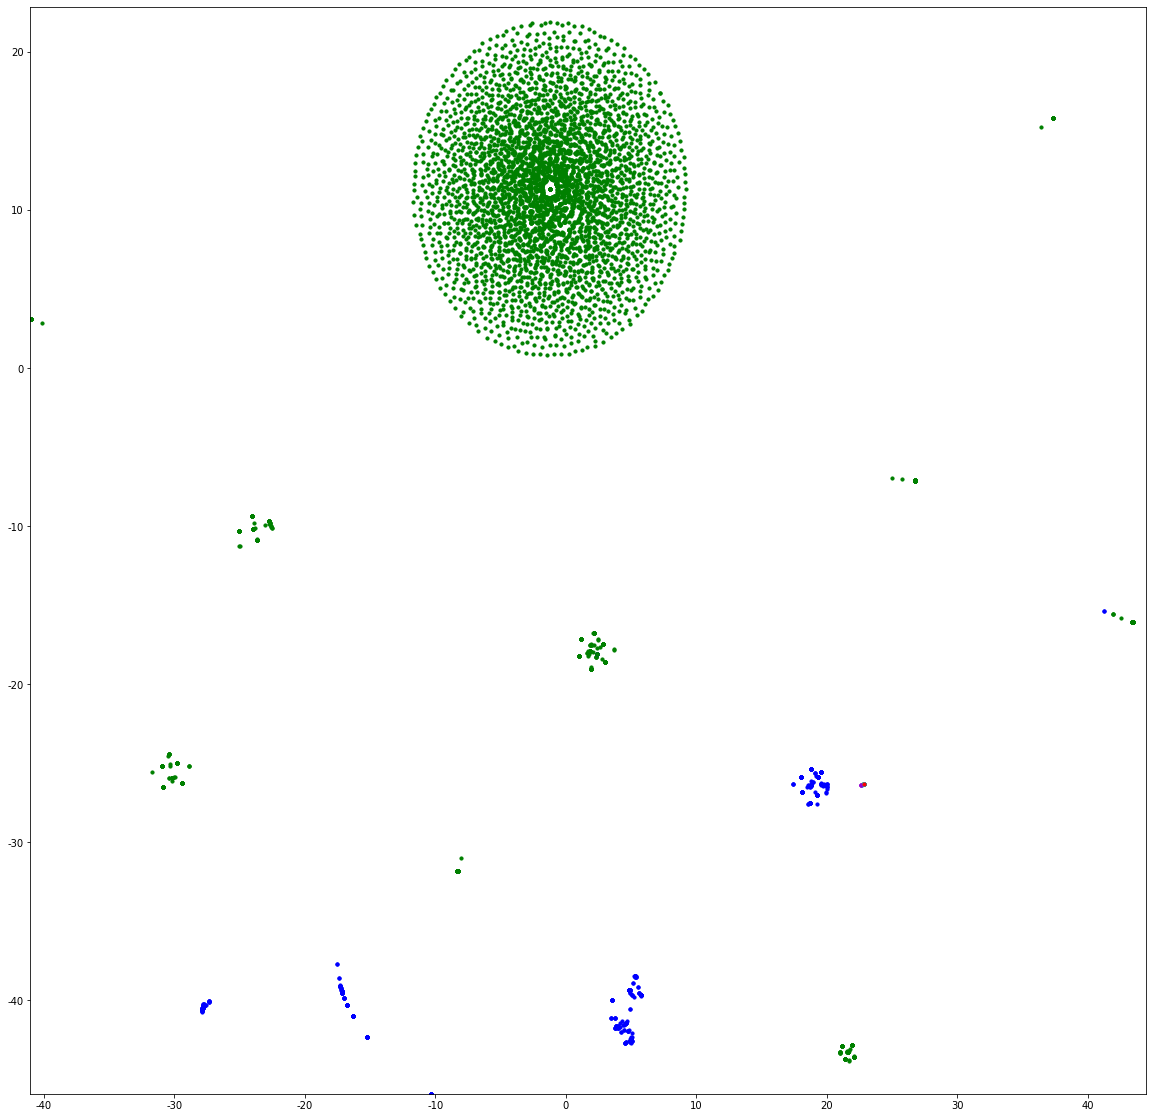

In [204]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)
for i in range(len(data)):
    if topics_num[i] == 10:
        color = 'darkviolet'
    elif topics_num[i] == 5:
        color = 'r'
    elif topics_num[i] == 4:
        color = 'c'
    elif topics_num[i] == 3:
        color = 'b'
    else:
        color = 'g'
        
    size = 10
    plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()

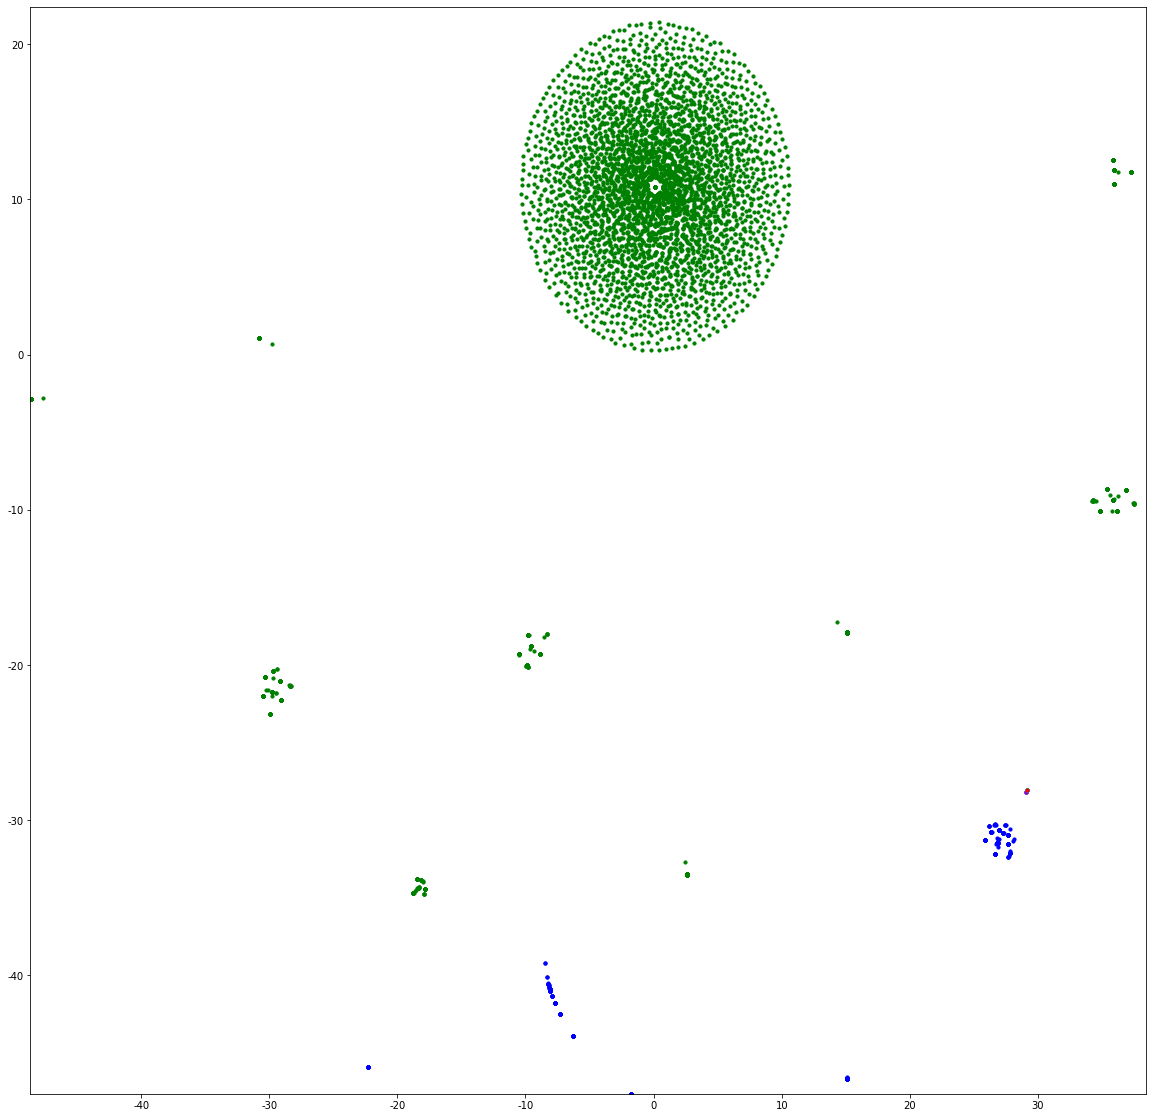

In [17]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)
for i in range(len(data)):
    if topics_num[i] == 10:
        color = 'darkviolet'
    elif topics_num[i] == 5:
        color = 'r'
    elif topics_num[i] == 4:
        color = 'c'
    elif topics_num[i] == 3:
        color = 'b'
    else:
        color = 'g'
        
    size = 10
    plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()

## global all topic words list

In [370]:
def find_csv_filenames(path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

filenames = find_csv_filenames("../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne")

all_topic_words = []

for i in range(len(filenames)):
    with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne/{filenames[i]}', newline='') as f:
        reader = csv.reader(f)
        topics = list(reader)
        topics = sum(topics, [])
        s_tw = set(topics)
        all_topic_words.append(topics)
        
all_topic_words_from_all_files = sum(all_topic_words, [])
print(len(all_topic_words_from_all_files))

82795


In [435]:
def word_count_and_tf_idf_similarity(filenames, topic_num, print_word_count=False, average=True):
    all_topic_words = []
    len_files = len(filenames)
    
    
    # print(f'topic_num: {topic_num}')
    # print('')
    
    for i in range(len(filenames)):
        with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne/{filenames[i]}', newline='') as f:
            reader = csv.reader(f)
            topics = list(reader)
            topics = sum(topics, [])
            s_tw = set(topics)
            all_topic_words.append(topics)
           
            tw_count_list = []
        
            for tw in s_tw:
                tw_count_list.append([tw, topics.count(tw)])
            
            tw_count_dict = dict(tw_count_list)
            sorted_dict = sorted(tw_count_dict.items(), key = lambda item: item[1], reverse = True)
            
            if print_word_count:
                print(filenames[i])
                print(sorted_dict)
                print()
                
    all_topic_words = sum(all_topic_words, [])
    s_atw = set(all_topic_words)
    
    atw_count_list = []
    
    for tw in s_atw:
        if average:
            atw_count_list.append([tw, float(round(all_topic_words.count(tw) / len_files, 4))])
        else:
            atw_count_list.append([tw, all_topic_words.count(tw)])
        
    atw_count_dict = dict(atw_count_list)
    all_sorted_dict = sorted(atw_count_dict.items(), key = lambda item: item[1], reverse = True)
    
    #print('all topic words count')
    #print(all_sorted_dict)
    #print()
    
    # print(f'number of topic words: {len(all_topic_words)}, number of communities: {len(filenames)}')
    # print()
    # print(f'random tf-idf similarity: {tf_idf_similarity_from_list(random.sample(all_topic_words_from_all_files, len(all_topic_words)))}')
    # print(f'tf-idf similarity: {tf_idf_similarity_from_list(all_topic_words)}')
    
    return all_sorted_dict

# number of topic 10 and 5 and 4

## topic_nums = 10 (members >= 10000)

In [384]:
communities_10 = []
communities_5 = []
communities_4 = []


for i in range(len(data)):
    if topics_num[i] == 10:
        communities_10.append(filenames[i])
    elif topics_num[i] == 5:
        communities_5.append(filenames[i])
    elif topics_num[i] == 4:
        communities_4.append(filenames[i])

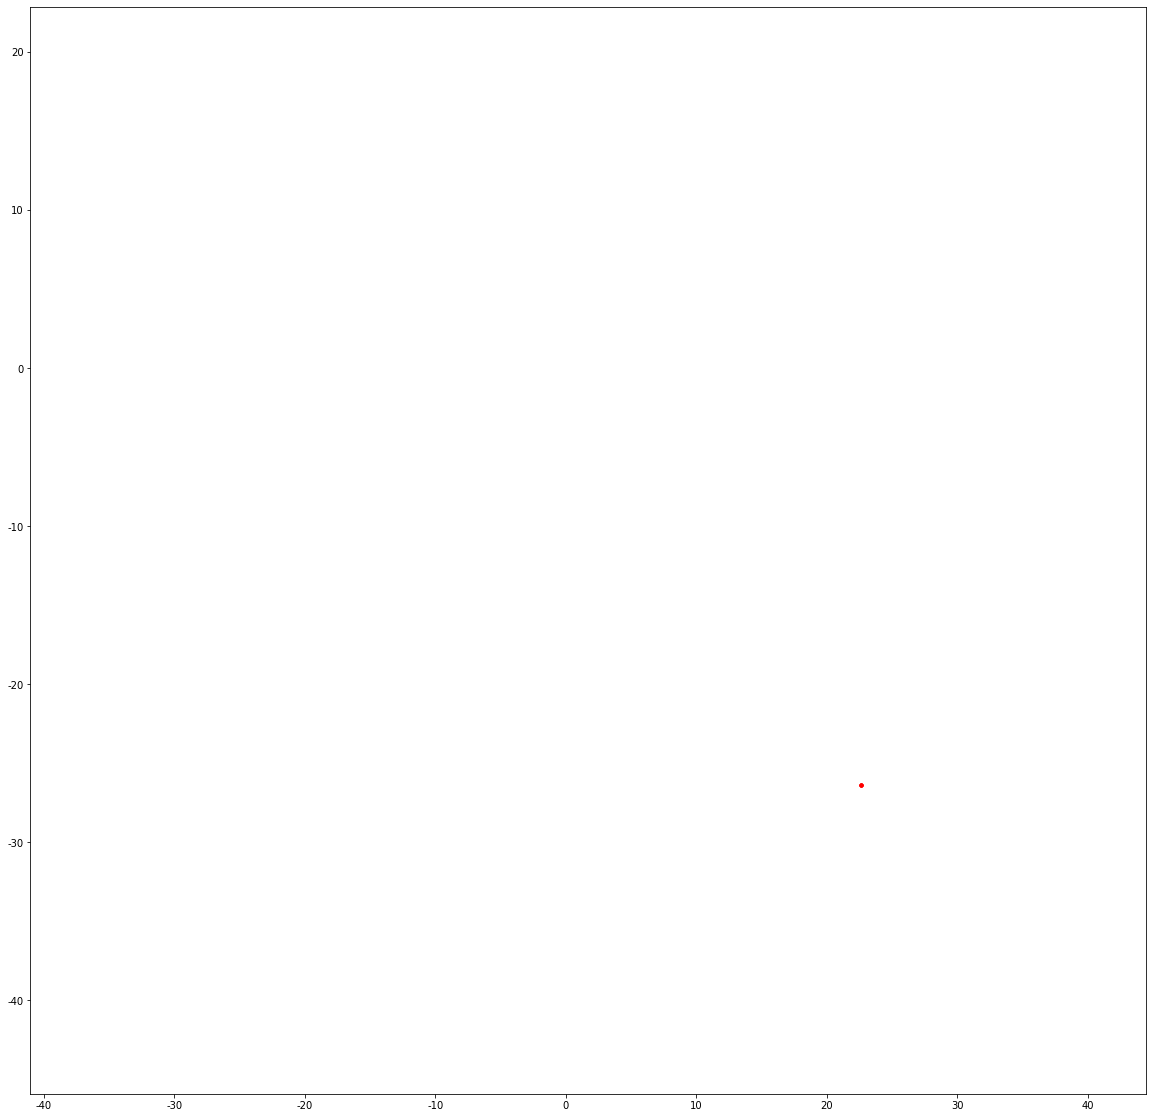

In [368]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

size = 10
for i in range(len(data)):
    if topics_num[i] == 10:
        color = '#ff0000'
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
        
    # plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()

In [440]:
print(word_count_and_tf_idf_similarity(communities_10, 10))

[('life', 2.75),
 ('year', 2.25),
 ('today', 2.0),
 ('think', 1.75),
 ('need', 1.5),
 ('one', 1.5),
 ('hate', 1.5),
 ('anxiety', 1.25),
 ('thought', 1.25),
 ('first', 1.25),
 ('depression', 1.25),
 ('friend', 1.25),
 ('time', 1.25),
 ('stop', 1.0),
 ('depressed', 1.0),
 ('day', 1.0),
 ('even', 1.0),
 ('talk', 1.0),
 ('love', 1.0),
 ('tell', 1.0),
 ('go', 1.0),
 ('wish', 1.0),
 ('alone', 1.0),
 ('cry', 1.0),
 ('dae', 1.0),
 ('kill', 1.0),
 ('sleep', 0.75),
 ('advice', 0.75),
 ('best', 0.75),
 ('care', 0.75),
 ('lost', 0.75),
 ('better', 0.75),
 ('old', 0.75),
 ('suicide', 0.75),
 ('this', 0.75),
 ('finally', 0.75),
 ('mom', 0.75),
 ('therapist', 0.75),
 ('wrong', 0.75),
 ('relationship', 0.75),
 ('work', 0.75),
 ('sad', 0.75),
 ('suicidal', 0.75),
 ('job', 0.75),
 ('right', 0.75),
 ('parent', 0.75),
 ('feeling', 0.75),
 ('you', 0.75),
 ('therapy', 0.75),
 ('mental', 0.75),
 ('made', 0.75),
 ('week', 0.75),
 ('person', 0.75),
 ('fuck', 0.75),
 ('birthday', 0.75),
 ('tired', 0.75),
 ('cou

## topic_nums = 5 (members >= 1000)

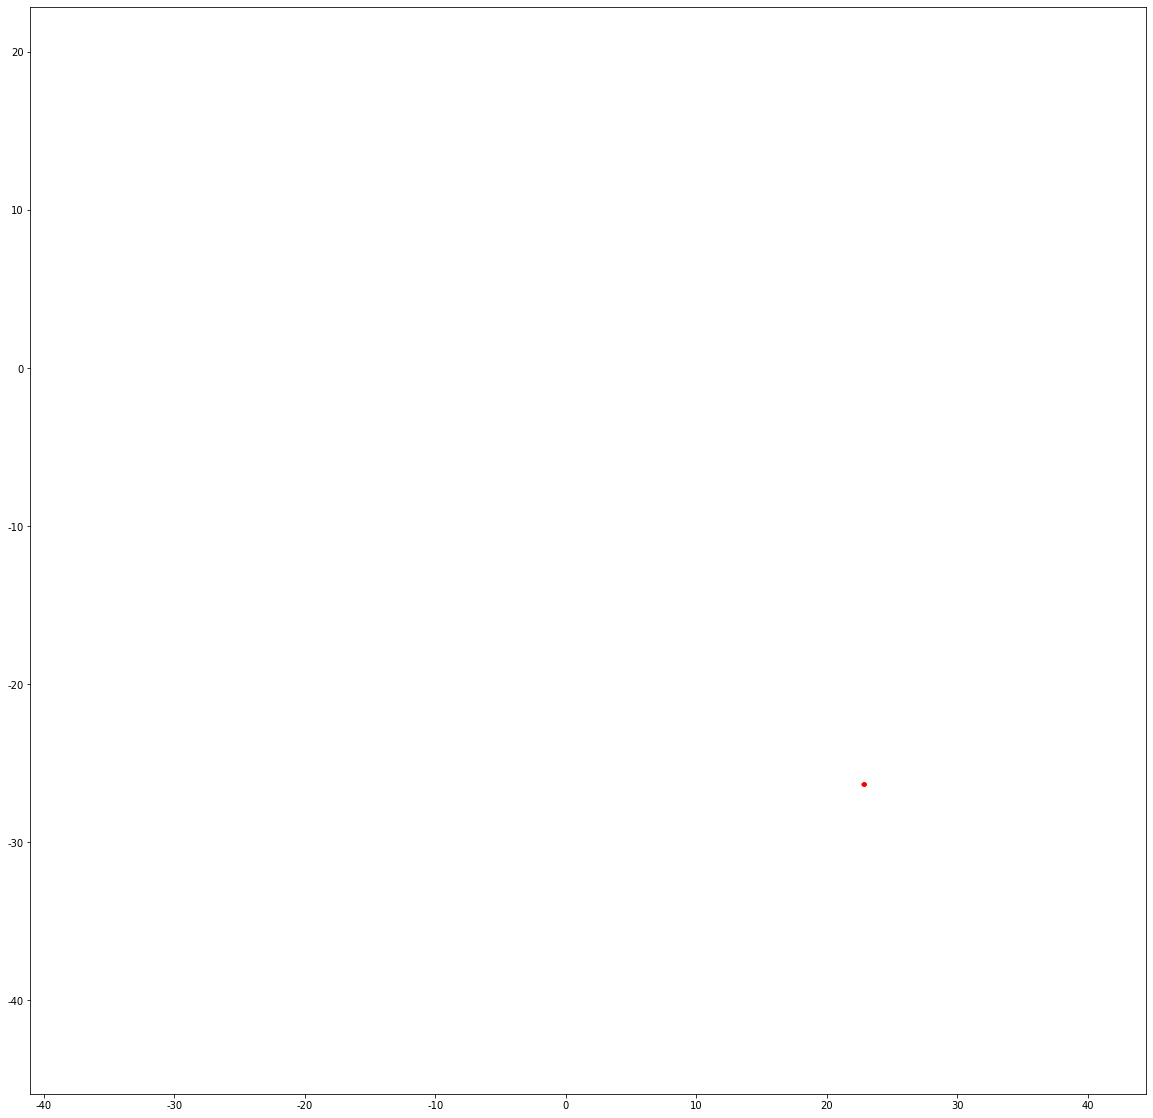

In [367]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

size = 10
for i in range(len(data)):
    if topics_num[i] == 5:
        color = '#ff0000'
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)

plt.show()

In [441]:
word_count_and_tf_idf_similarity(communities_5, 5)

[('friend', 2.0),
 ('need', 1.8),
 ('life', 1.6),
 ('think', 1.6),
 ('depression', 1.4),
 ('time', 1.4),
 ('suicide', 1.2),
 ('today', 1.2),
 ('year', 1.2),
 ('kill', 1.2),
 ('advice', 1.0),
 ('one', 1.0),
 ('day', 1.0),
 ('angry', 1.0),
 ('go', 1.0),
 ('hate', 1.0),
 ('anger', 1.0),
 ('bullied', 0.8),
 ('stop', 0.8),
 ('bully', 0.8),
 ('bullying', 0.8),
 ('depressed', 0.8),
 ('feeling', 0.8),
 ('anxiety', 0.6),
 ('die', 0.6),
 ('suicidal', 0.6),
 ('thought', 0.6),
 ('fuck', 0.6),
 ('lost', 0.4),
 ('this', 0.4),
 ('month', 0.4),
 ('hurt', 0.4),
 ('harm', 0.4),
 ('existential', 0.4),
 ('say', 0.4),
 ('sad', 0.4),
 ('much', 0.4),
 ('school', 0.4),
 ('living', 0.4),
 ('end', 0.4),
 ('person', 0.4),
 ('crisis', 0.4),
 ('tired', 0.4),
 ('lonely', 0.4),
 ('find', 0.4),
 ('clean', 0.4),
 ('guy', 0.4),
 ('death', 0.2),
 ('mad', 0.2),
 ('universe', 0.2),
 ('stand', 0.2),
 ('music', 0.2),
 ('never', 0.2),
 ('killing', 0.2),
 ('care', 0.2),
 ('still', 0.2),
 ('everyone', 0.2),
 ('legit', 0.2),
 (

## topic_nums = 4 (members >= 100)

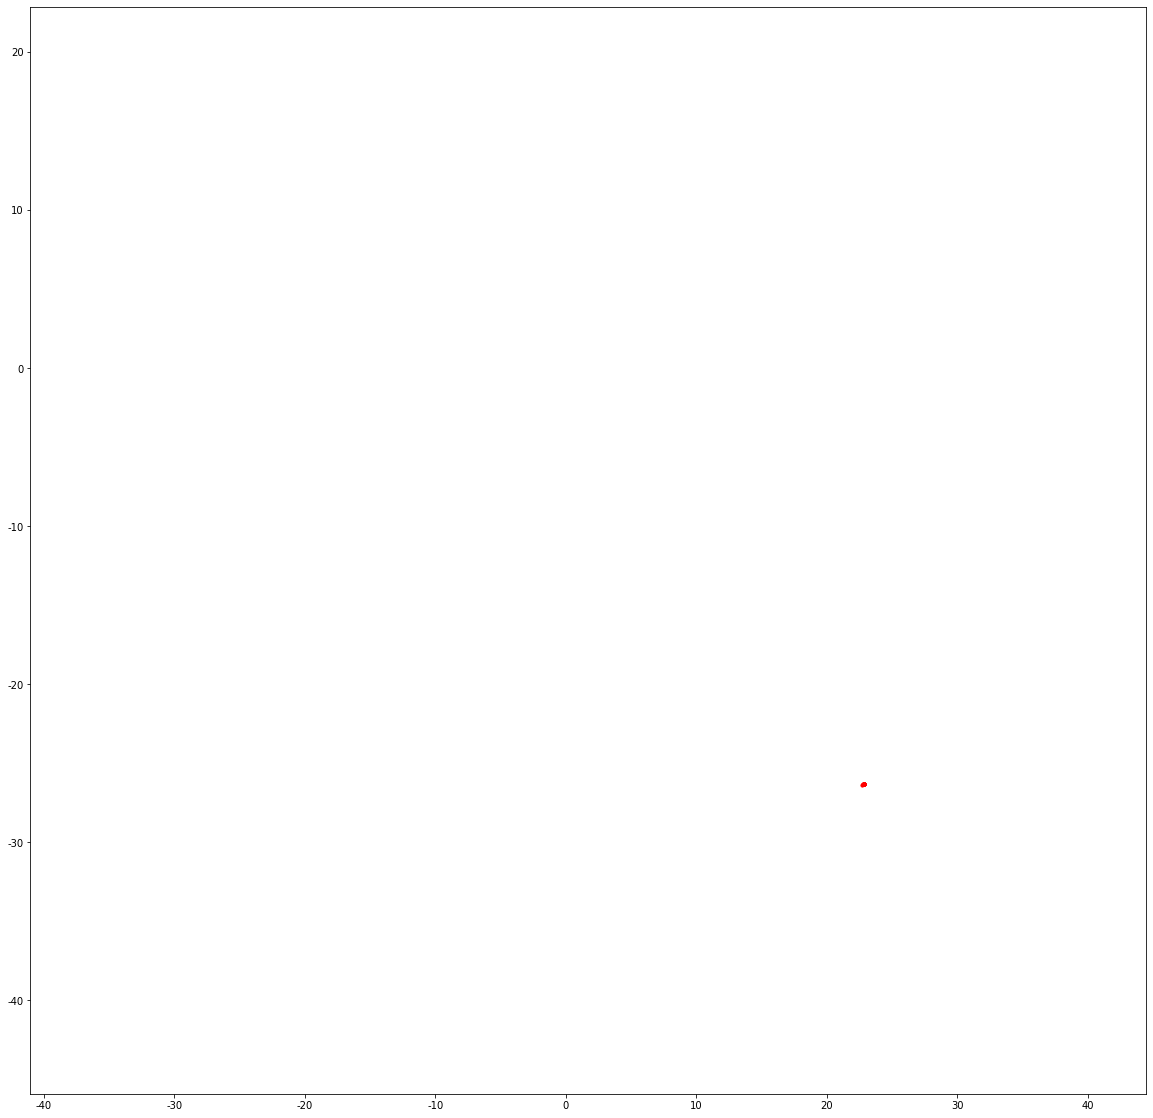

In [310]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

size = 10
for i in range(len(data)):
    if topics_num[i] == 4:
        color = '#ff0000'
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
        
    # plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()

In [443]:
print(word_count_and_tf_idf_similarity(communities_4, 4))

[('need', 1.3571), ('depression', 1.3571), ('life', 1.2143), ('depressed', 0.8571), ('friend', 0.7857), ('hate', 0.7143), ('one', 0.6429), ('talk', 0.6429), ('think', 0.6429), ('year', 0.6429), ('kill', 0.6429), ('die', 0.5714), ('time', 0.5714), ('stop', 0.5), ('anxiety', 0.5), ('suicide', 0.5), ('today', 0.5), ('thought', 0.5), ('tired', 0.5), ('better', 0.4286), ('day', 0.4286), ('alone', 0.4286), ('feeling', 0.4286), ('advice', 0.3571), ('never', 0.3571), ('go', 0.3571), ('much', 0.3571), ('end', 0.3571), ('way', 0.3571), ('give', 0.3571), ('care', 0.2857), ('lost', 0.2857), ('back', 0.2857), ('nothing', 0.2857), ('ive', 0.2857), ('hair', 0.2857), ('first', 0.2857), ('old', 0.2143), ('even', 0.2143), ('tonight', 0.2143), ('work', 0.2143), ('sad', 0.2143), ('worse', 0.2143), ('cry', 0.2143), ('therapy', 0.2143), ('made', 0.2143), ('actually', 0.2143), ('alive', 0.2143), ('birthday', 0.2143), ('lonely', 0.2143), ('scared', 0.2143), ('best', 0.1429), ('idk', 0.1429), ('killing', 0.142

## topic_nums = 3 (members >= 10)

# 3-1)

In [264]:
communities_3 = []

for i in range(len(data)):
    if topics_num[i] == 3:
        communities_3.append(filenames[i])

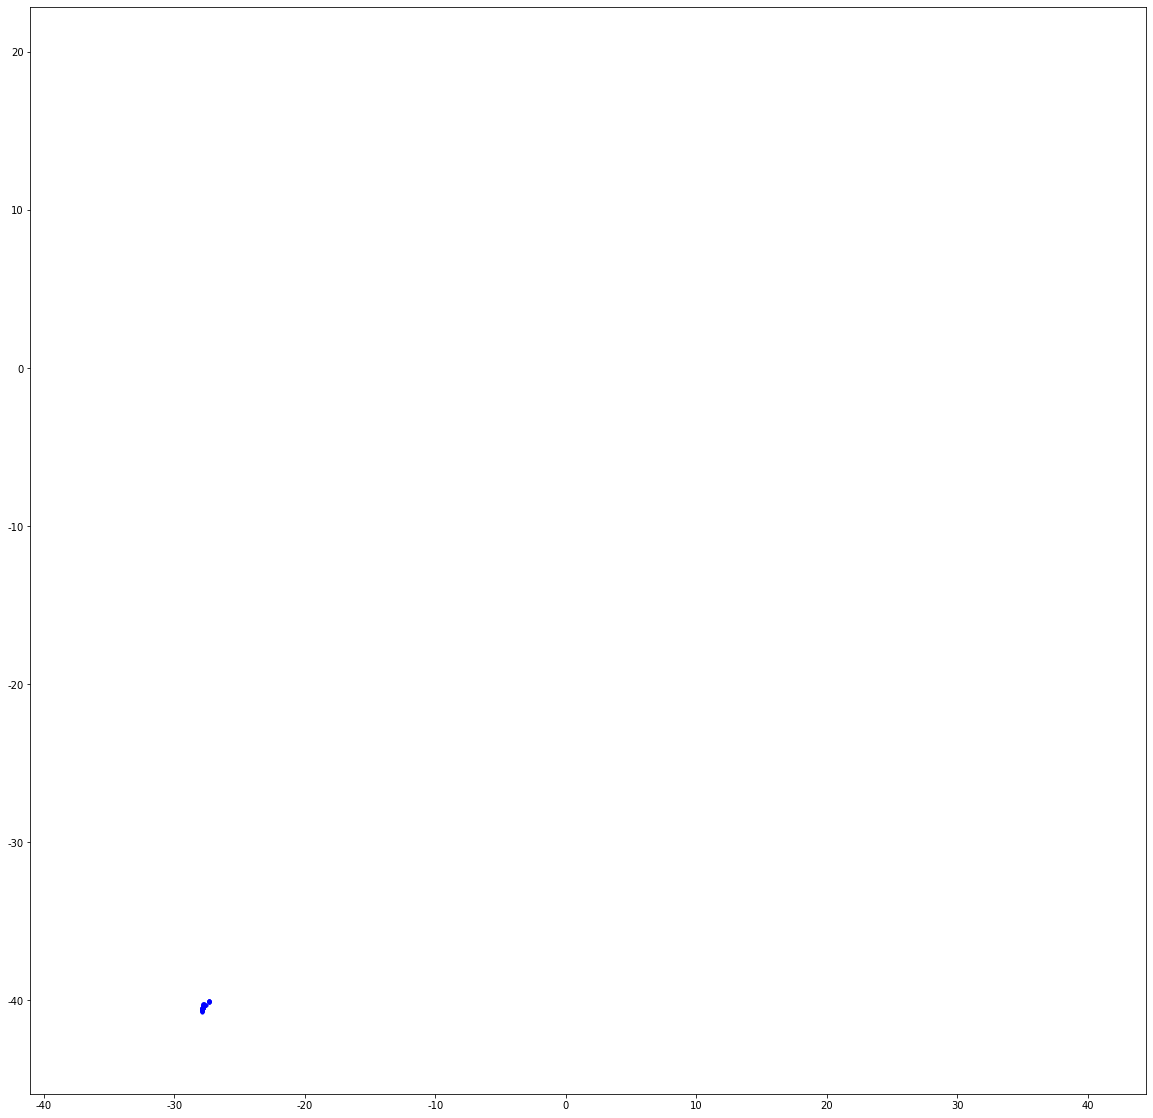

In [372]:
communities_3_1 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'b'

for i in range(len(data)):
    if topics_num[i] == 3:
        if data_tsne[i,0] > -30 and data_tsne[i,0] < -20 and data_tsne[i,1] < -20:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_3_1.append(filenames[i])

# 3-2)

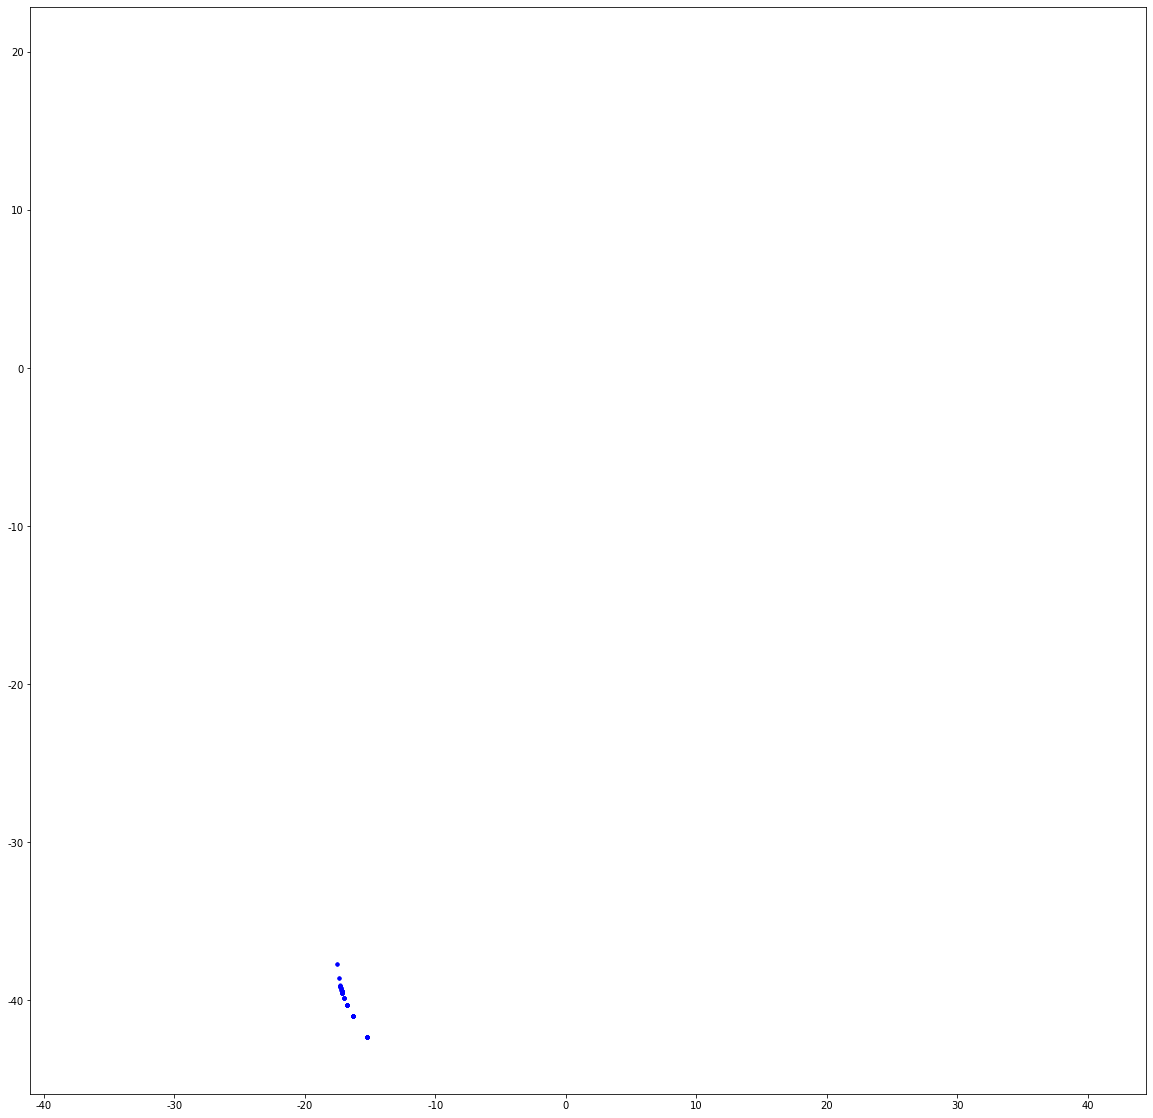

In [373]:
communities_3_2 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 3:
        if data_tsne[i,0] > -20 and data_tsne[i,0] < -12:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_3_2.append(filenames[i])

# 3-3)

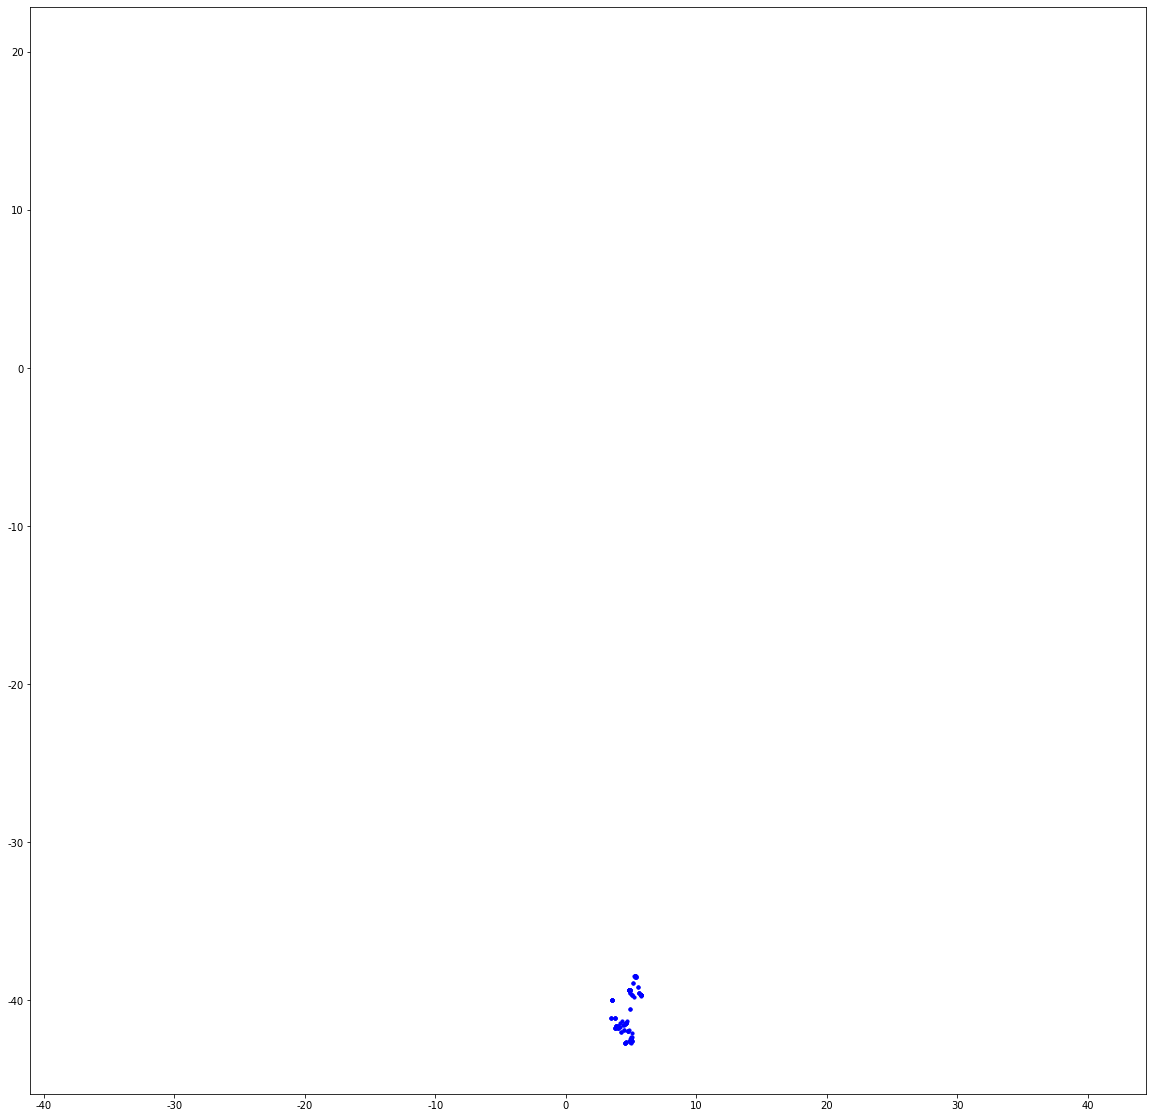

In [374]:
communities_3_3 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 3:
        if data_tsne[i,0] > 0 and data_tsne[i,0] < 10 and data_tsne[i,1] < -20:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_3_3.append(filenames[i])

# 3-4)

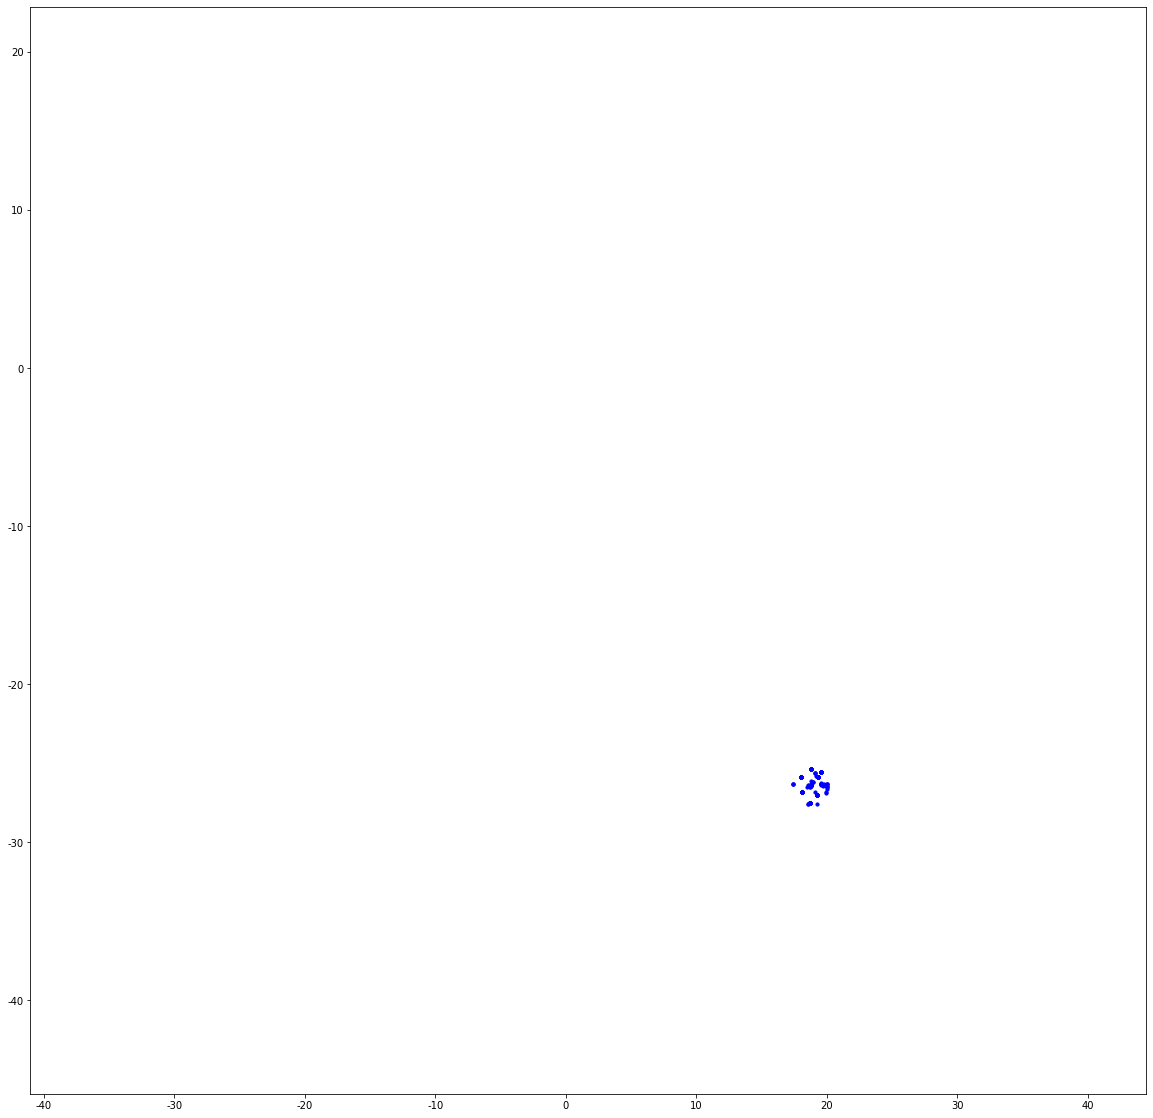

In [375]:
communities_3_4 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 3:
        if data_tsne[i,1] > -30 and data_tsne[i,1] < -20:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_3_4.append(filenames[i])

In [448]:
idx = 1

for count in zip(word_count_and_tf_idf_similarity(communities_3_1, 3), word_count_and_tf_idf_similarity(communities_3_2, 3), 
                word_count_and_tf_idf_similarity(communities_3_3, 3), word_count_and_tf_idf_similarity(communities_3_4, 3)):
    print(f'{idx}: {count}')
    print()
    idx += 1

1: (('need', 0.5375), ('life', 0.495), ('life', 0.5111), ('life', 0.4281))

2: (('life', 0.525), ('need', 0.4158), ('depression', 0.4222), ('depression', 0.3028))

3: (('depression', 0.4125), ('die', 0.4158), ('need', 0.3611), ('need', 0.2936))

4: (('friend', 0.375), ('hate', 0.3465), ('friend', 0.3444), ('friend', 0.2875))

5: (('hate', 0.35), ('kill', 0.3366), ('year', 0.3111), ('think', 0.2385))

6: (('time', 0.3375), ('talk', 0.2871), ('think', 0.2889), ('kill', 0.2355))

7: (('talk', 0.3), ('lonely', 0.2772), ('day', 0.2778), ('depressed', 0.2232))

8: (('kill', 0.2875), ('depression', 0.2673), ('die', 0.2611), ('die', 0.2232))

9: (('think', 0.275), ('think', 0.2475), ('feeling', 0.2611), ('feeling', 0.2171))

10: (('year', 0.2625), ('birthday', 0.2475), ('today', 0.2444), ('year', 0.2171))

11: (('one', 0.25), ('alone', 0.2277), ('kill', 0.2444), ('one', 0.208))

12: (('today', 0.25), ('anxiety', 0.2178), ('time', 0.2278), ('time', 0.2018))

13: (('anxiety', 0.25), ('friend', 0

## topic_nums = 1 (members < 10)

# 1-1)

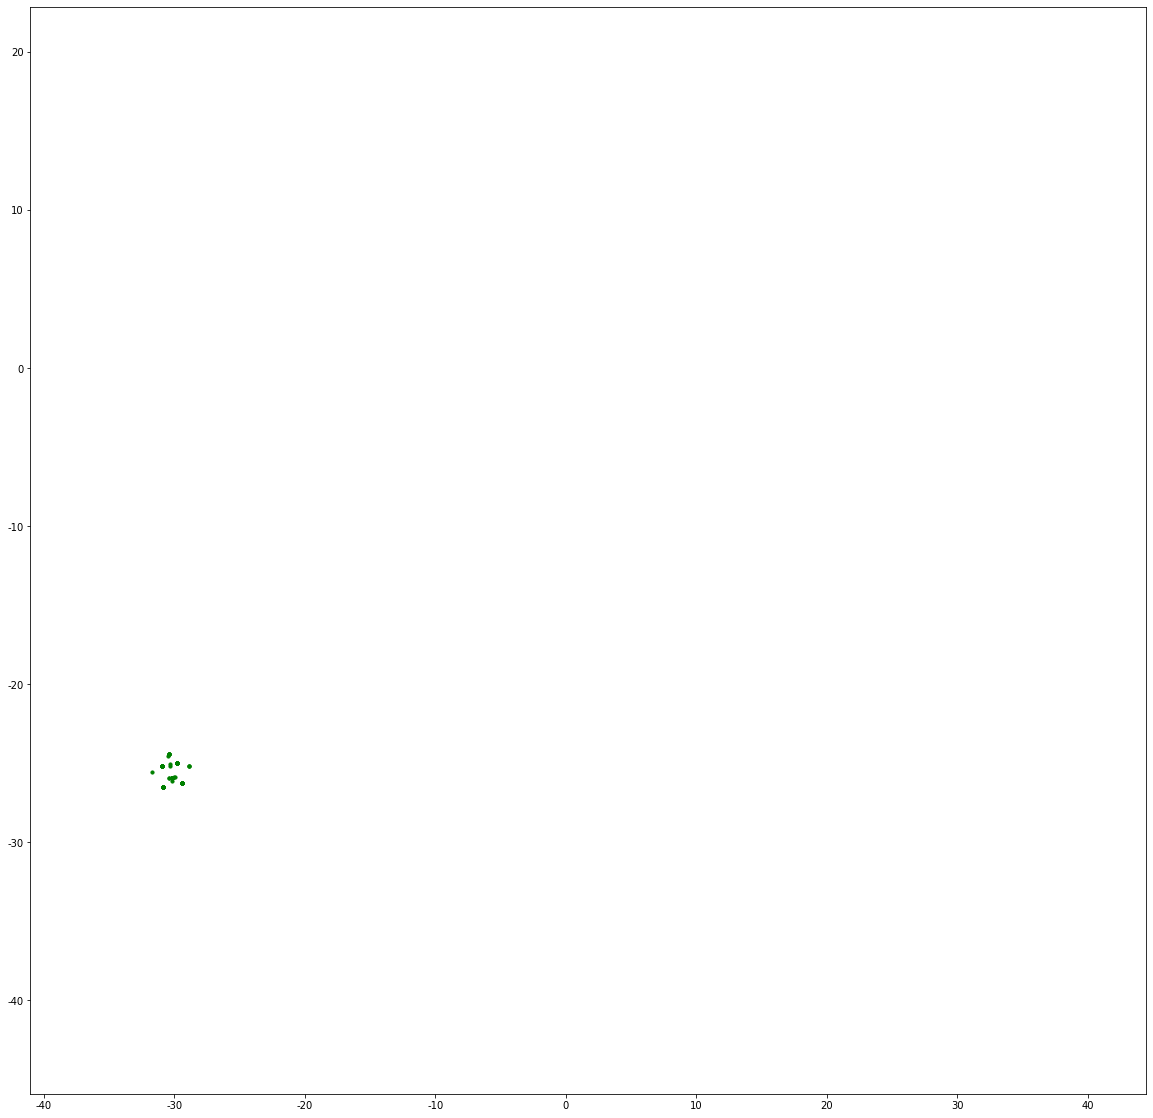

In [377]:
communities_1_1 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'g'

for i in range(len(data)):
    if topics_num[i] == 1:
        if data_tsne[i,0] > -35 and data_tsne[i,0] < -28:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_1_1.append(filenames[i])

# 1-2)

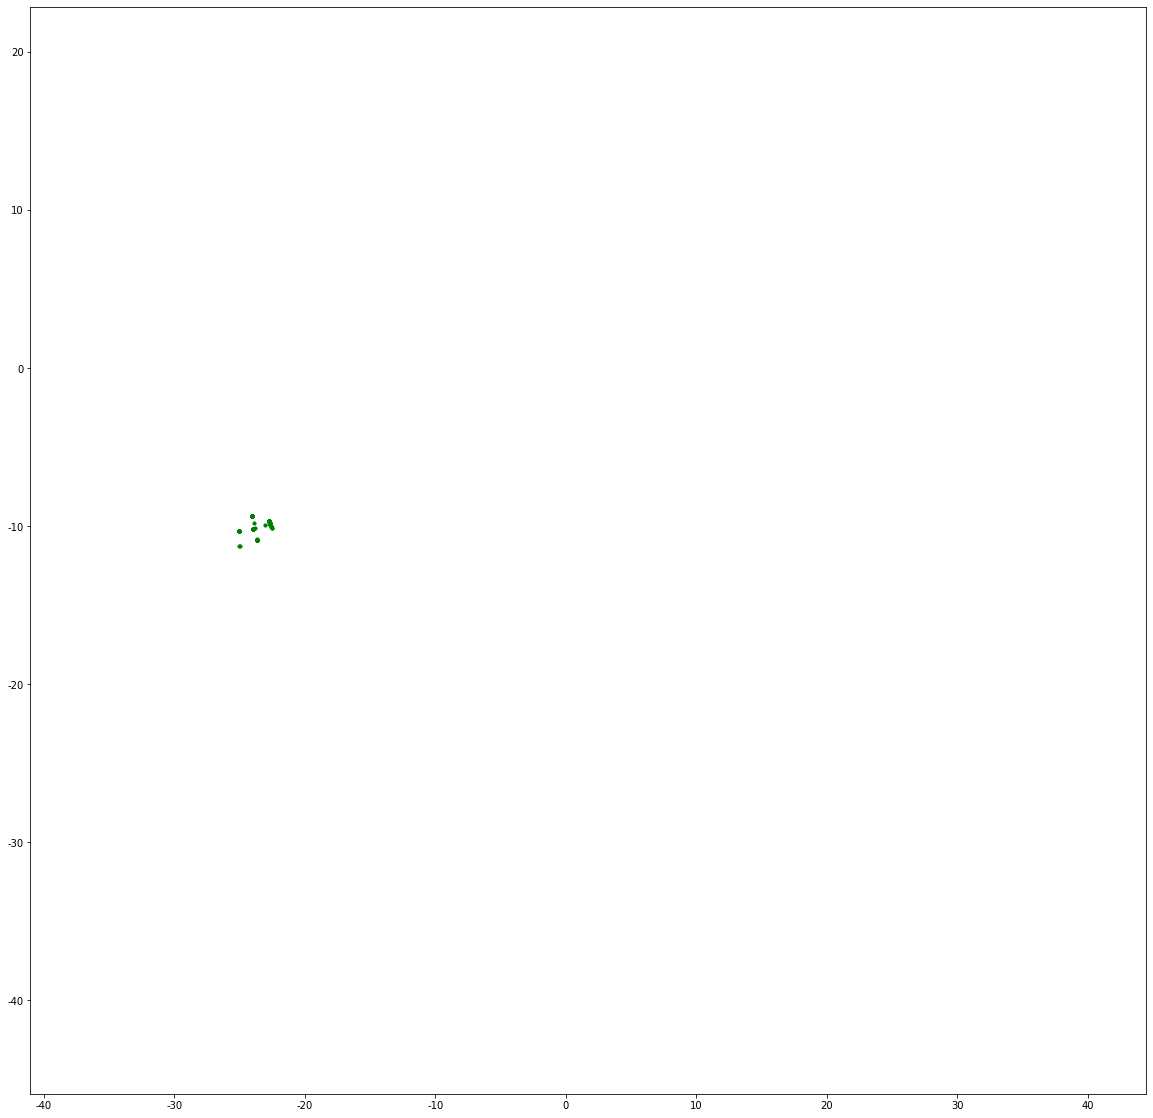

In [378]:
communities_1_2 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 1:
        if data_tsne[i,0] > -28 and data_tsne[i,0] < -20:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_1_2.append(filenames[i])

# 1-3)

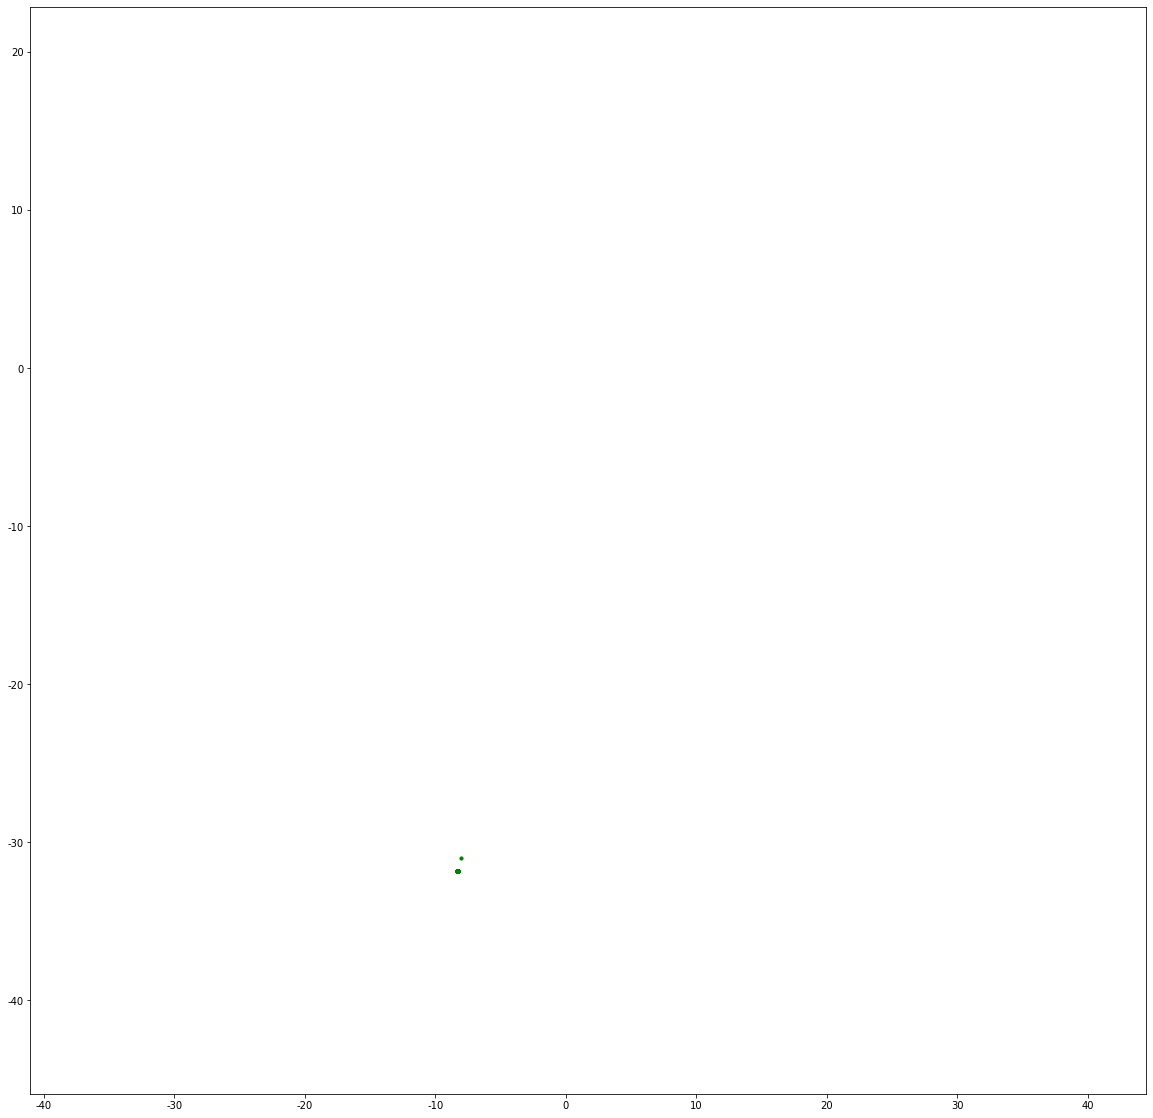

In [379]:
communities_1_3 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 1:
        if data_tsne[i,0] > -12 and data_tsne[i,0] < -5 and data_tsne[i,1] < -30:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_1_3.append(filenames[i])

# 1-4)

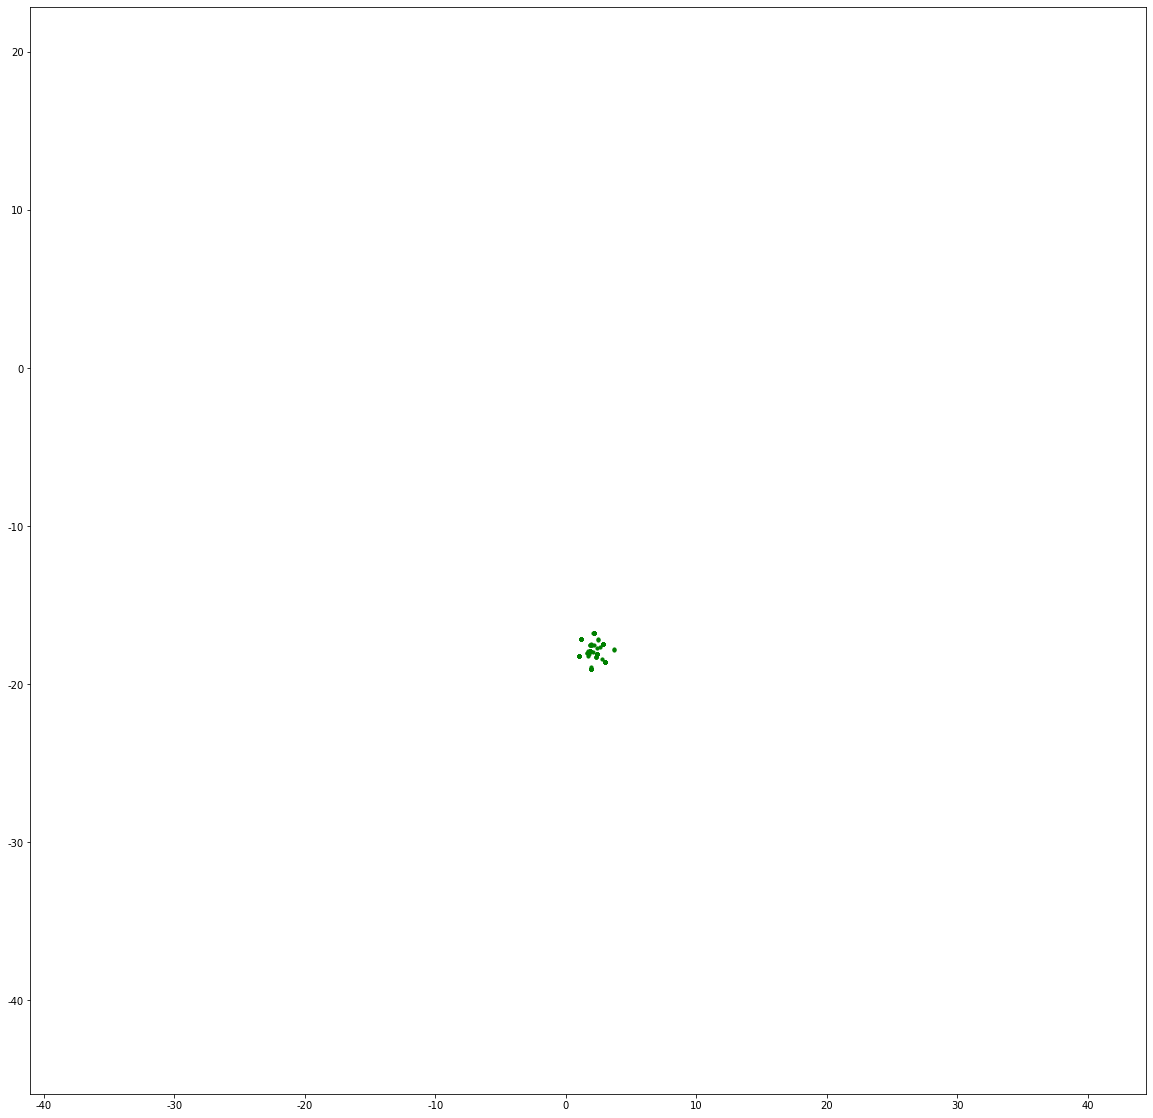

In [380]:
communities_1_4 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 1:
        if data_tsne[i,0] > -0 and data_tsne[i,0] < 10 and data_tsne[i,1] < -10 and data_tsne[i,1] > -20:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_1_4.append(filenames[i])

# 1-5)

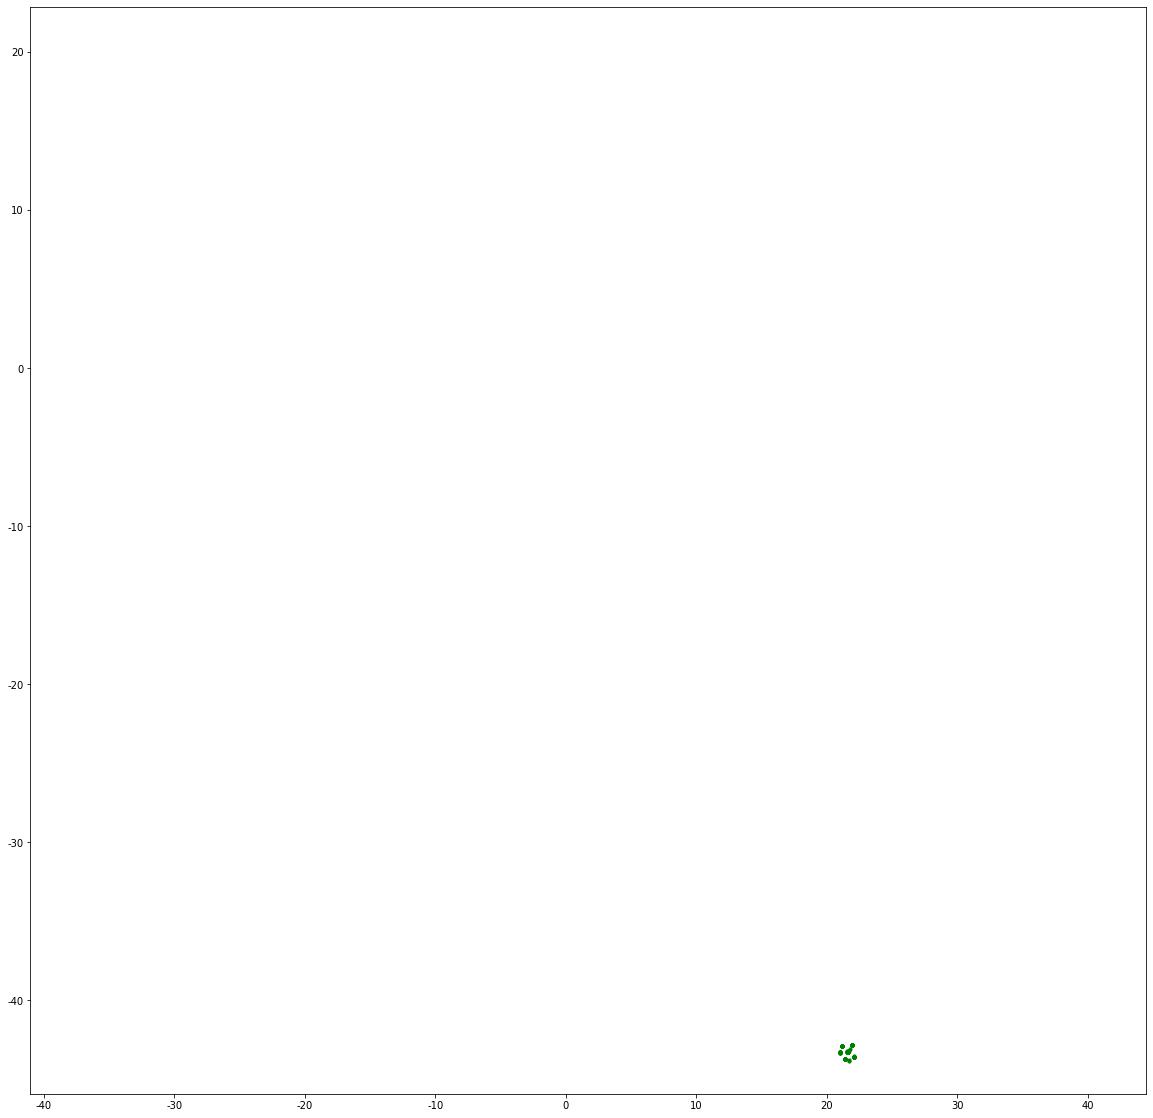

In [381]:
communities_1_5 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 1:
        if data_tsne[i,1] < -40:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_1_5.append(filenames[i])

In [450]:
idx = 1

for count in zip(word_count_and_tf_idf_similarity(communities_1_1, 1), word_count_and_tf_idf_similarity(communities_1_2, 1), 
                word_count_and_tf_idf_similarity(communities_1_3, 1), word_count_and_tf_idf_similarity(communities_1_4, 1),
                word_count_and_tf_idf_similarity(communities_1_5, 1)):
    print(f'{idx}: {count}')
    print()
    idx += 1

1: (('life', 0.1197), ('friend', 0.064), ('need', 0.0559), ('life', 0.1048), ('need', 0.0429))

2: (('friend', 0.0931), ('need', 0.0613), ('friend', 0.0382), ('need', 0.081), ('die', 0.0429))

3: (('year', 0.0691), ('life', 0.0613), ('life', 0.0324), ('year', 0.0595), ('help', 0.0368))

4: (('need', 0.0638), ('die', 0.0427), ('depressed', 0.0265), ('kill', 0.0595), ('done', 0.0368))

5: (('anxiety', 0.0638), ('kill', 0.04), ('alone', 0.0235), ('friend', 0.0571), ('kill', 0.0368))

6: (('thought', 0.0559), ('depression', 0.04), ('lonely', 0.0235), ('think', 0.0548), ('talk', 0.0184))

7: (('depression', 0.0532), ('time', 0.04), ('talk', 0.0235), ('die', 0.0524), ('goodbye', 0.0184))

8: (('kill', 0.0532), ('alone', 0.0373), ('hate', 0.0235), ('anxiety', 0.05), ('friend', 0.0184))

9: (('talk', 0.0505), ('suicide', 0.0347), ('die', 0.0206), ('day', 0.0476), ('exist', 0.0123))

10: (('day', 0.0479), ('talk', 0.032), ('today', 0.0206), ('depression', 0.0476), ('option', 0.0123))

11: (('th